In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import statistics
#导入warnings包，利用过滤器来实现忽略警告语句
import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all'

# Import Data and Data Describe

In [2]:
#读取数据
application_data = pd.read_csv("application_data.csv")

In [3]:
#查看维度
application_data.shape 

(307511, 122)

In [4]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
#查看数据特征类型
pd.set_option('display.max_rows', 122)
application_data.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [6]:
#查看数值变量的情况（describe）
application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


# Data cleaning

针对缺失值有四种情况：
1.缺省值极多：若缺省值样本占总数比例极高，直接舍弃，因为作为特征加入反而会引入噪声值。

2.非连续特征缺省值适中：如果缺值的样本适中，而该属性非连续值特征属性，就把NaN作为一个新类别，加入到类别特征中。

3.连续特征缺省值适中：如果缺值的样本适中，考虑给定一个step，然后离散化，将NaN作为一个type加入到属性类目中。

4.缺省值较少：考虑利用填充的办法进行处理。其中有均值、众数、中位数填充；用sklearn里的RandomForest模型去拟合数据样本训练模型，然后去填充缺失值；拉格朗日插值法。

In [7]:
#查看每个特征数据缺失的百分比：(每列的缺失数/每列的总数)*100
pd.set_option('display.max_rows', 122)
application_data_missing_rate = (application_data.isnull().sum()/len(application_data))*100
application_data_missing_rate

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

<AxesSubplot:>

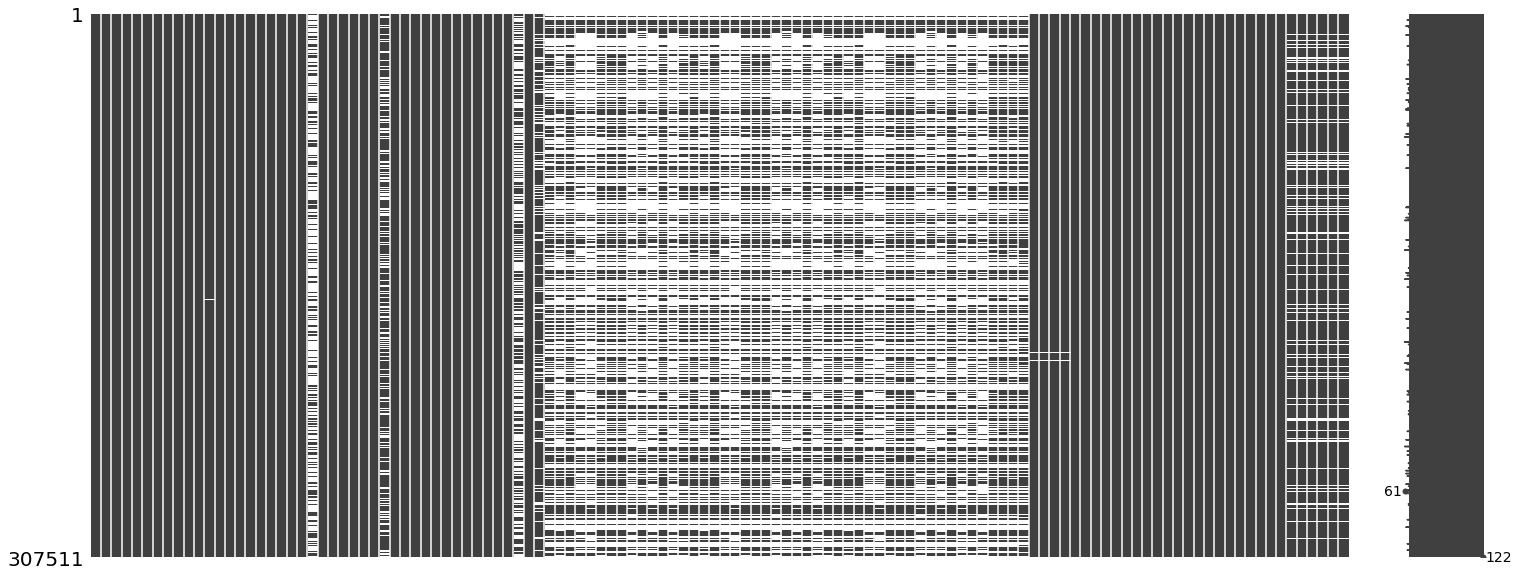

In [8]:
#整体数据缺失值可视化查看：白线越多，代表缺失值越多
msno.matrix(application_data)
plt.show()

In [9]:
#缺失情况描述
empty_column = [] #67个特征有缺失：len(empty_column)
for e, c in enumerate(application_data.columns):
    if sum(pd.isnull(application_data[c]))!=0:
        empty_column.append(c)
        print("feature_no:%d \t feature_name:%s \t null_num:%d \t null_rate: %.6f%%"% (e+1, c , sum(pd.isnull(application_data[c])), 
                                                                  100*sum(pd.isnull(application_data[c]))/len(application_data[c])))

feature_no:10 	 feature_name:AMT_ANNUITY 	 null_num:12 	 null_rate: 0.003902%
feature_no:11 	 feature_name:AMT_GOODS_PRICE 	 null_num:278 	 null_rate: 0.090403%
feature_no:12 	 feature_name:NAME_TYPE_SUITE 	 null_num:1292 	 null_rate: 0.420148%
feature_no:22 	 feature_name:OWN_CAR_AGE 	 null_num:202929 	 null_rate: 65.990810%
feature_no:29 	 feature_name:OCCUPATION_TYPE 	 null_num:96391 	 null_rate: 31.345545%
feature_no:30 	 feature_name:CNT_FAM_MEMBERS 	 null_num:2 	 null_rate: 0.000650%
feature_no:42 	 feature_name:EXT_SOURCE_1 	 null_num:173378 	 null_rate: 56.381073%
feature_no:43 	 feature_name:EXT_SOURCE_2 	 null_num:660 	 null_rate: 0.214626%
feature_no:44 	 feature_name:EXT_SOURCE_3 	 null_num:60965 	 null_rate: 19.825307%
feature_no:45 	 feature_name:APARTMENTS_AVG 	 null_num:156061 	 null_rate: 50.749729%
feature_no:46 	 feature_name:BASEMENTAREA_AVG 	 null_num:179943 	 null_rate: 58.515956%
feature_no:47 	 feature_name:YEARS_BEGINEXPLUATATION_AVG 	 null_num:150007 	 null_ra

<AxesSubplot:>

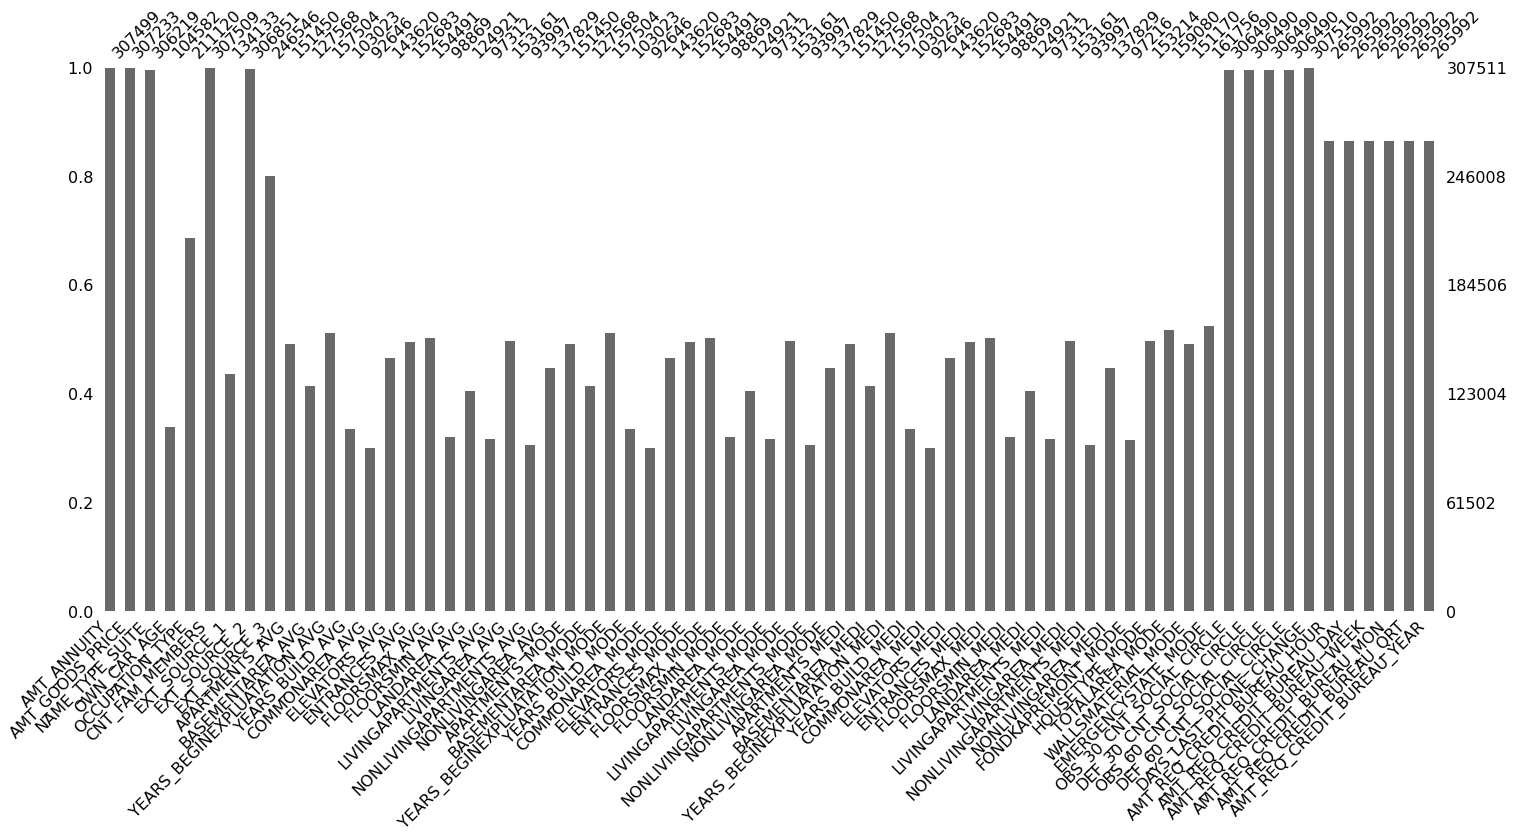

In [10]:
#缺失值柱状图
application_data_missing = application_data[empty_column]
msno.bar(application_data_missing, labels=True)

<AxesSubplot:>

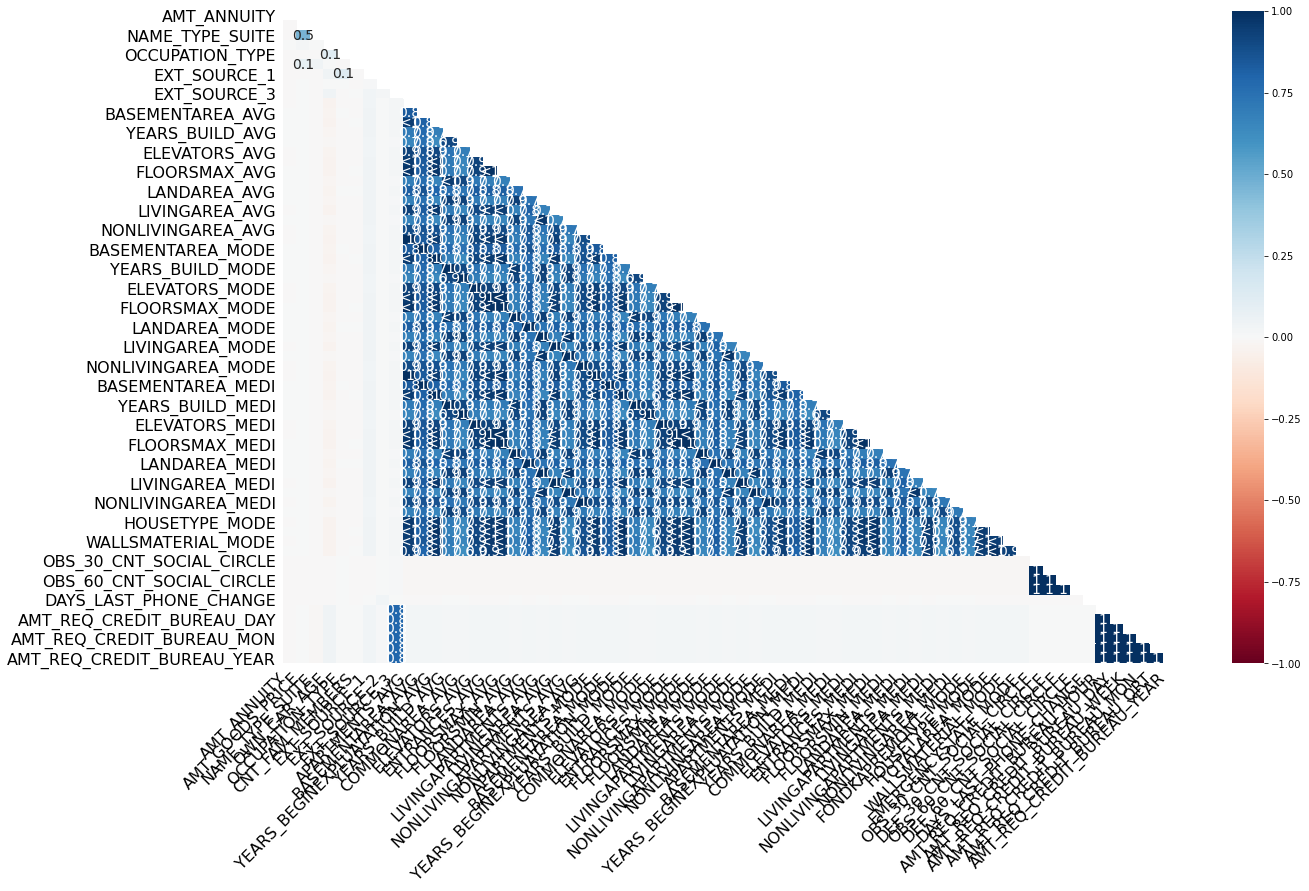

In [11]:
#缺失值的热图:缺失的比例和情况
msno.heatmap(application_data_missing)

<AxesSubplot:>

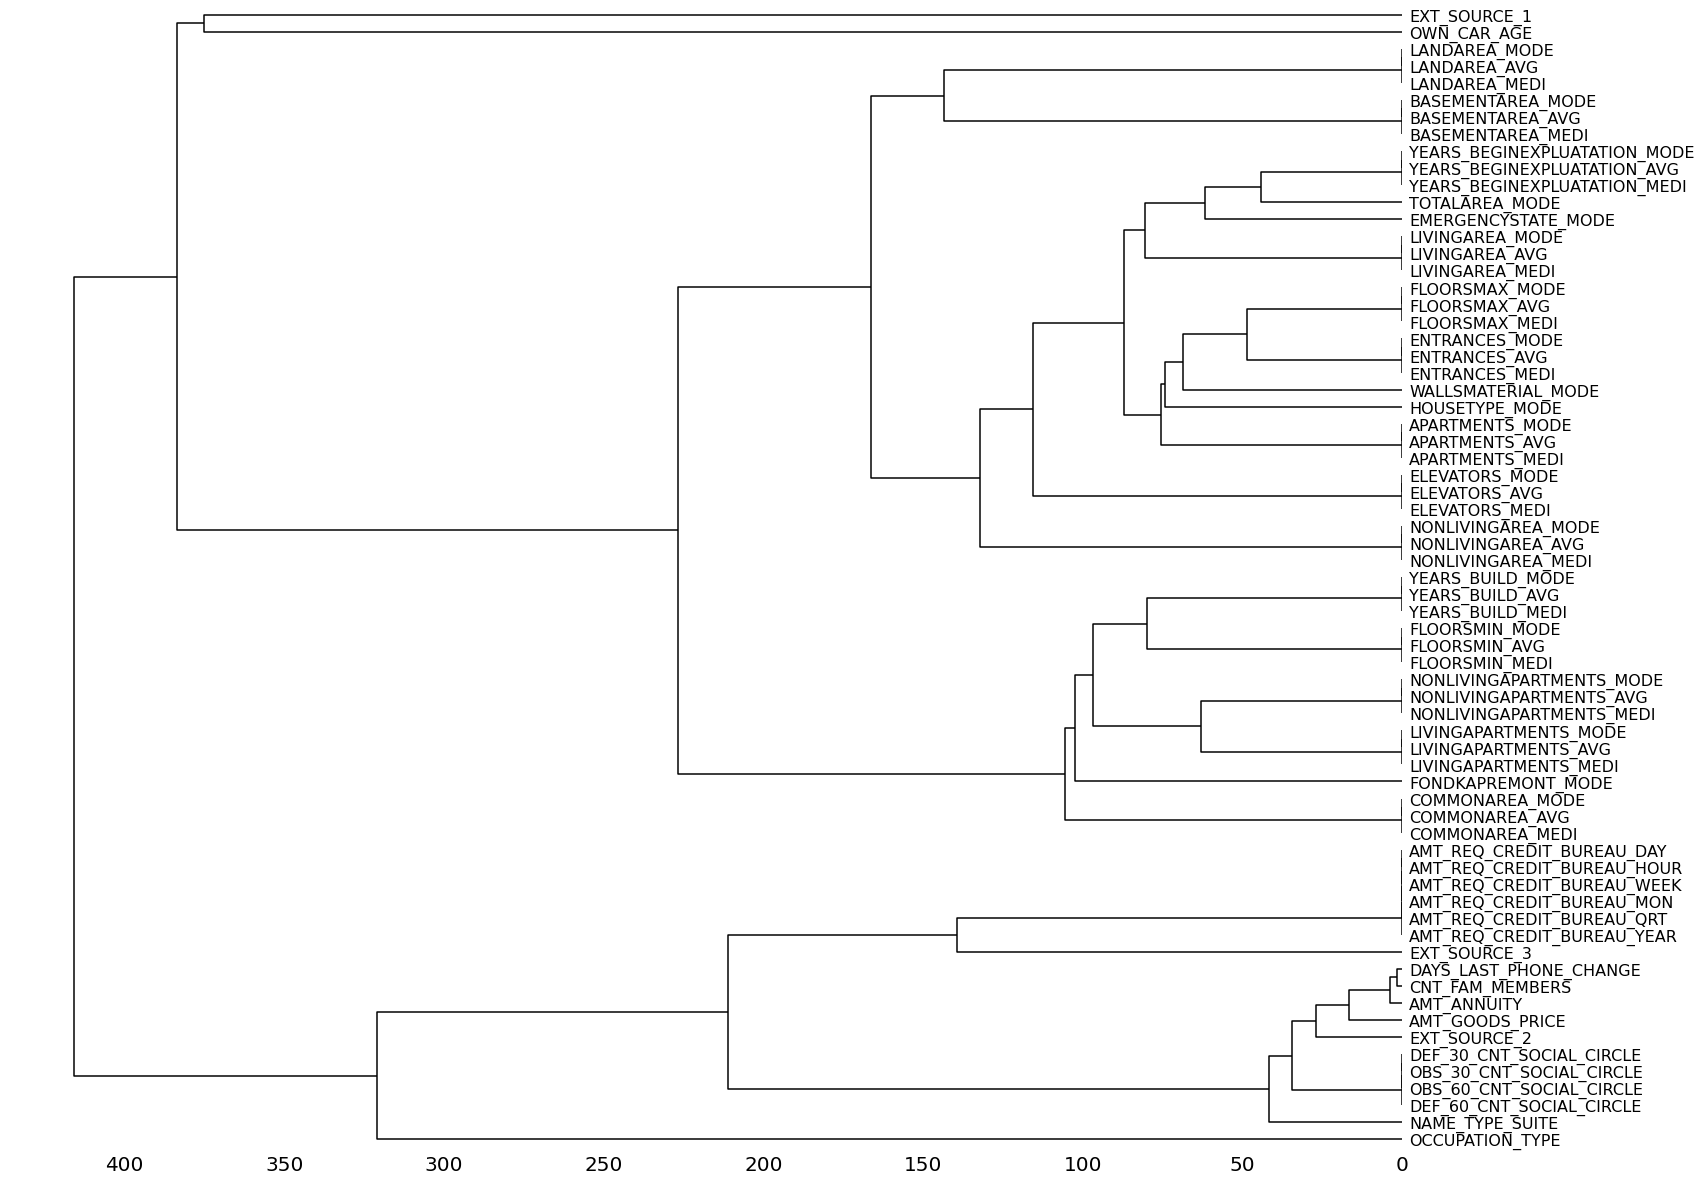

In [12]:
#树状图
msno.dendrogram(application_data_missing)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121]),
 [Text(0, 0, 'SK_ID_CURR'),
  Text(1, 0, 'TARGET'),
  Text(2, 0, 'NAME_CONTRACT_TYPE'),
  Text(3, 0, 'CODE_GENDER'),
  Text(4, 0, 'FLAG_OWN_CAR'),
  Text(5, 0, 'FLAG_OWN_REALTY'),
  Text(6, 0, 'CNT_CHILDREN'),
  Text(7, 0, 'AMT_INCOME_TOTAL'),
  Text(8, 0, 'AMT_CREDIT'),
  Text(9, 0, 'AMT_ANNUITY'),
  Text(

Text(0.5, 1.0, 'Percentage of Missing values in application_data')

Text(0, 0.5, 'Null Values PERCENTAGE')

Text(0.5, 0, 'COLUMNS')

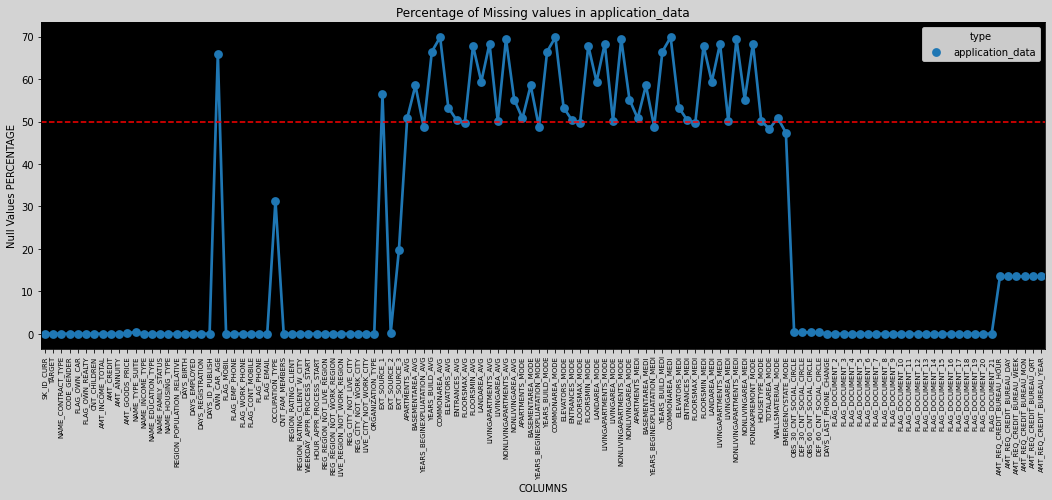

In [13]:
#数据缺失率图
fig = plt.figure(figsize=(18,6))
application_data_null = pd.DataFrame((application_data.isnull().sum()/application_data.shape[0])*100).reset_index()
application_data_null.columns = ['Column Name', 'Null Values Percentage']
application_data_null["type"] = "application_data"
ax = sns.pointplot('Column Name','Null Values Percentage',data=application_data_null,hue="type")
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values in application_data")
plt.ylabel("Null Values PERCENTAGE")
plt.xlabel("COLUMNS")
ax.axhline(50, ls='--',color='red')
ax.set_facecolor("k")
fig.set_facecolor("lightgrey")

Text(0.5, 1.0, 'Crossing missing values & # columns')

Text(0.5, 0, '% Missing')

Text(0, 0.5, '# Columns')

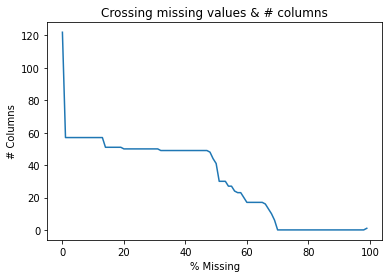

In [14]:
data = [1] * 100
for i in range(0,99) : 
    data[i]=len(application_data.columns[(100*application_data.isnull().sum()/len(application_data))>=i])

plt.plot(data)
plt.title("Crossing missing values & # columns")
plt.xlabel('% Missing')
plt.ylabel('# Columns')

In [15]:
#application_data中数据缺失率超过40%的数据显示：49列
application_data_null_cols_40 = application_data_null[application_data_null["Null Values Percentage"] > 40]
application_data_null_cols_40
len(application_data_null_cols_40)

,Column Name,Null Values Percentage,type
21,OWN_CAR_AGE,65.990810,application_data
41,EXT_SOURCE_1,56.381073,application_data
44,APARTMENTS_AVG,50.749729,application_data
45,BASEMENTAREA_AVG,58.515956,application_data
46,YEARS_BEGINEXPLUATATION_AVG,48.781019,application_data
47,YEARS_BUILD_AVG,66.497784,application_data
48,COMMONAREA_AVG,69.872297,application_data
49,ELEVATORS_AVG,53.295980,application_data
50,ENTRANCES_AVG,50.348768,application_data
51,FLOORSMAX_AVG,49.760822,application_data


49

In [16]:
#移除缺失率高于40%的列：49列
application_data_null_cols_40_index = list(application_data_null_cols_40['Column Name'])
application_data = application_data.drop(labels=application_data_null_cols_40_index,axis=1)
len(application_data.columns)# 剩73列
application_data

73

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# 去除的特征
application_data_null_cols_40_index

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MOD

In [18]:
#定义删除的column名的list
unwanting_list = list()

<Figure size 1728x864 with 0 Axes>

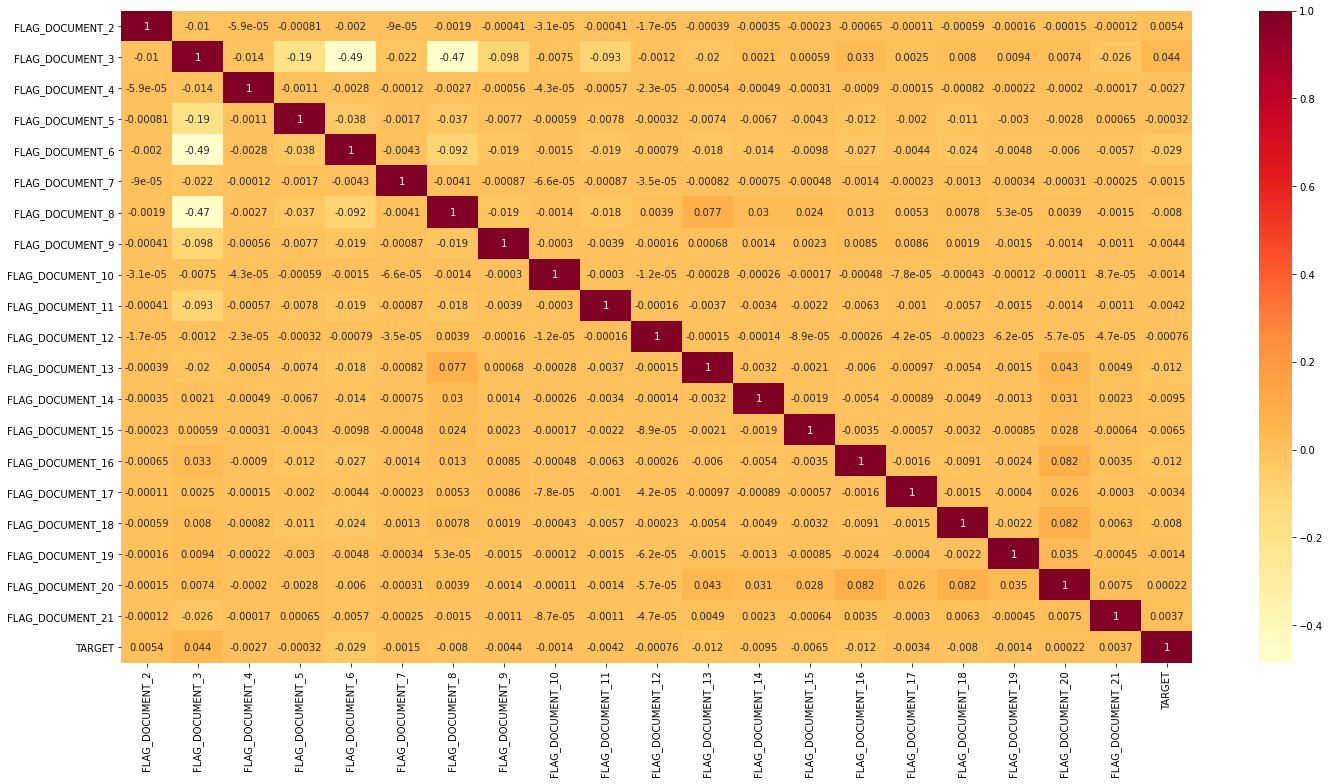

In [19]:
plt.figure(figsize=(24, 12))
application_data_source = application_data[["FLAG_DOCUMENT_2","FLAG_DOCUMENT_3","FLAG_DOCUMENT_4","FLAG_DOCUMENT_5","FLAG_DOCUMENT_6","FLAG_DOCUMENT_7","FLAG_DOCUMENT_8",
                                            "FLAG_DOCUMENT_9","FLAG_DOCUMENT_10","FLAG_DOCUMENT_11","FLAG_DOCUMENT_12","FLAG_DOCUMENT_13","FLAG_DOCUMENT_14","FLAG_DOCUMENT_15",
                                            "FLAG_DOCUMENT_16","FLAG_DOCUMENT_17","FLAG_DOCUMENT_18","FLAG_DOCUMENT_19","FLAG_DOCUMENT_20","FLAG_DOCUMENT_21","TARGET"]]
application_data_source_corr = application_data_source.corr()
ax = sns.heatmap(application_data_source_corr,
            xticklabels=application_data_source_corr.columns,
            yticklabels=application_data_source_corr.columns,
            annot = True, #显示数字
            cmap ="YlOrRd")
#除了FLAG_DOCUMENT_2、FLAG_DOCUMENT_3、FLAG_DOCUMENT_20、FLAG_DOCUMENT_21与目标变量之间具有相关性，其余删除

In [20]:
unwanting_list = unwanting_list + ["FLAG_DOCUMENT_4","FLAG_DOCUMENT_5","FLAG_DOCUMENT_6","FLAG_DOCUMENT_7",
                  "FLAG_DOCUMENT_8","FLAG_DOCUMENT_9","FLAG_DOCUMENT_10","FLAG_DOCUMENT_11",
                  "FLAG_DOCUMENT_12","FLAG_DOCUMENT_13","FLAG_DOCUMENT_14","FLAG_DOCUMENT_15",
                  "FLAG_DOCUMENT_16","FLAG_DOCUMENT_17","FLAG_DOCUMENT_18","FLAG_DOCUMENT_19"]

<AxesSubplot:>

(array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 0, '')

Text(0, 0.5, '')

Text(0.5, 1.0, 'FLAG_DOCUMENT_2')

<AxesSubplot:>

(array([     0.,  25000.,  50000.,  75000., 100000., 125000., 150000.,
        175000., 200000., 225000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 0, '')

Text(0, 0.5, '')

Text(0.5, 1.0, 'FLAG_DOCUMENT_3')

<AxesSubplot:>

(array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 0, '')

Text(0, 0.5, '')

Text(0.5, 1.0, 'FLAG_DOCUMENT_20')

<AxesSubplot:>

(array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 0, '')

Text(0, 0.5, '')

Text(0.5, 1.0, 'FLAG_DOCUMENT_21')

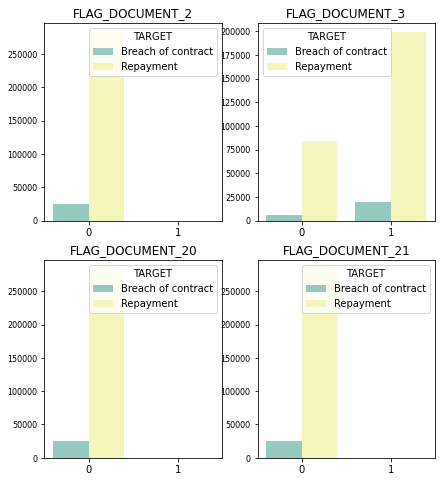

In [21]:
import itertools
#(这些变量为二值变量)，注意到相关性并不高，进一步判断FLAG_DOCUMENT_2、FLAG_DOCUMENT_3、FLAG_DOCUMENT_20、FLAG_DOCUMENT_21与目标变量的相关性
cols = [ 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
cols_all = cols + ['TARGET']
temp = application_data[cols_all]
length = len(cols)
#将TARGET中的0、1进行替换，0：还款，1：违约
temp["TARGET"] = temp["TARGET"].replace({1:"Breach of contract",0:"Repayment"})
fig = plt.figure(figsize=(7,8))
for i,j in itertools.zip_longest(cols,range(length)):
    plt.subplot(2,2,j+1)
    ax = sns.countplot(temp[i],hue=temp["TARGET"],palette="Set3")
    plt.yticks(fontsize=8)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)
# 'FLAG_DOCUMENT_2','FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'变量下，用户的违约与还款均发生在变量取值为0时，即用户未提交文件2、20、21
# 因此分析'FLAG_DOCUMENT_2','FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'变量无法得出文件提交对目标变量的影响
# 结合上一个cell的分析结果，'FLAG_DOCUMENT_2','FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'与目标变量的相关性比起'FLAG_DOCUMENT_3'小得多
# 删除'FLAG_DOCUMENT_2','FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'

In [22]:
unwanting_list = unwanting_list + ['FLAG_DOCUMENT_2','FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

<Figure size 720x432 with 0 Axes>

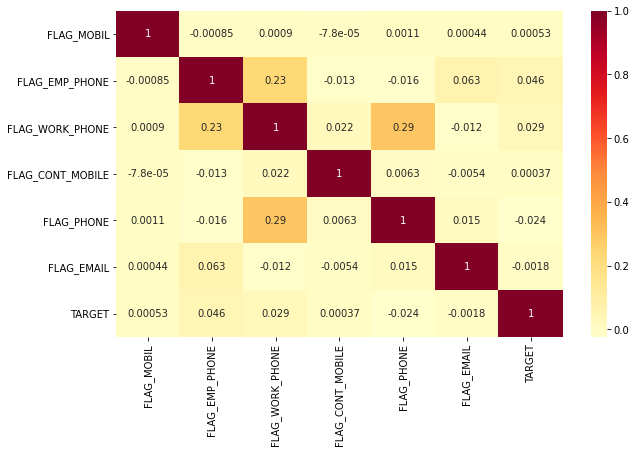

In [23]:
plt.figure(figsize=(10, 6))
application_data_source = application_data[['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL','TARGET']]
application_data_source_corr = application_data_source.corr()
ax = sns.heatmap(application_data_source_corr,
            xticklabels=application_data_source_corr.columns,
            yticklabels=application_data_source_corr.columns,
            annot = True, #显示数字
            cmap ="YlOrRd")
#FLAG_PHONE、FLAG_EMAIL与目标变量不相关，删除

<AxesSubplot:>

(array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 0, '')

Text(0, 0.5, '')

Text(0.5, 1.0, 'FLAG_MOBIL')

<AxesSubplot:>

(array([     0.,  50000., 100000., 150000., 200000., 250000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 0, '')

Text(0, 0.5, '')

Text(0.5, 1.0, 'FLAG_EMP_PHONE')

<AxesSubplot:>

(array([     0.,  50000., 100000., 150000., 200000., 250000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 0, '')

Text(0, 0.5, '')

Text(0.5, 1.0, 'FLAG_WORK_PHONE')

<AxesSubplot:>

(array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 0, '')

Text(0, 0.5, '')

Text(0.5, 1.0, 'FLAG_CONT_MOBILE')

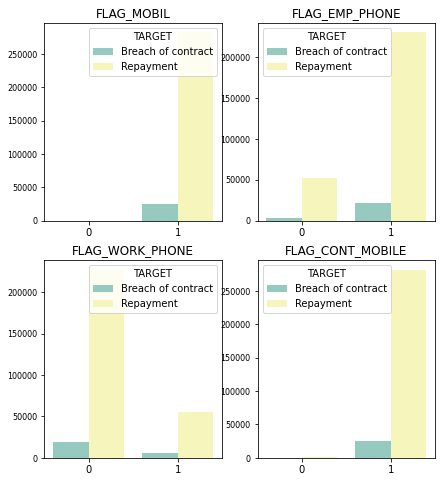

In [24]:
#相关性并不高，进一步判断
cols = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE']
cols_all = cols + ['TARGET']
temp = application_data[cols_all]
length = len(cols)
#将TARGET中的0、1进行替换，0：还款，1：违约
temp["TARGET"] = temp["TARGET"].replace({1:"Breach of contract",0:"Repayment"})
fig = plt.figure(figsize=(7,8))
for i,j in itertools.zip_longest(cols,range(length)):
    plt.subplot(2,2,j+1)
    ax = sns.countplot(temp[i],hue=temp["TARGET"],palette="Set3")
    plt.yticks(fontsize=8)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)
# 删除FLAG_MOBIL、FLAG_CONT_MOBILE

In [25]:
#综合考虑，结合逻辑分析，贷款时会对电话等联系方式进行验证，所以电话等联系方式的提供与否与贷款偿还无关，均删除
unwanting_list = unwanting_list + ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL']

In [26]:
#地址二值变量数据与贷款偿还与否有关，违约者更可能提供假地址或临时性地址，保留
#删除上述unwanting_list
application_data = application_data.drop(labels=unwanting_list,axis=1)
len(application_data.columns)
application_data

48

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,-1134.0,1,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1.0,0.0,-828.0,1,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,-815.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2.0,0.0,-617.0,1,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,-1106.0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0.0,0.0,-273.0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0.0,0.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,6.0,0.0,-1909.0,1,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.0,0.0,-322.0,1,0.0,0.0,0.0,0.0,0.0,0.0


# 缺失值处理

<AxesSubplot:ylabel='AMT_ANNUITY'>

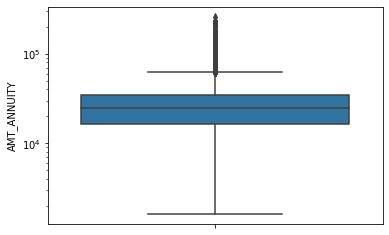

In [27]:
#AMT_ANNUITY
#0.003902%的缺失率
#AMT_ANNUITY的箱线图
sns.boxplot(y=application_data['AMT_ANNUITY'])
plt.yscale('log')
plt.show()
#由箱线图可以看出：存在较多异常值超出上限，因此使用中位数填充缺失值

In [28]:
#中位数填充缺失值
temp = application_data['AMT_ANNUITY'].median()
application_data['AMT_ANNUITY'].fillna(value=temp,inplace=True)

<AxesSubplot:ylabel='AMT_GOODS_PRICE'>

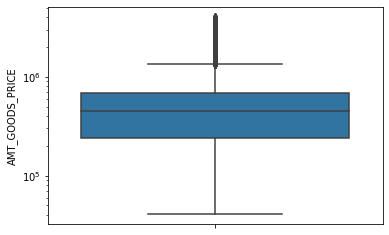

In [29]:
# AMT_GOODS_PRICE
#0.090403%的缺失率
#AMT_GOODS_PRICE的箱线图
sns.boxplot(y=application_data['AMT_GOODS_PRICE'])
plt.yscale('log')
plt.show()
#由箱线图可以看出：存在较多异常值超出上限，因此使用中位数填充缺失值

In [30]:
#中位数填充缺失值
temp = application_data['AMT_GOODS_PRICE'].median()
application_data['AMT_GOODS_PRICE'].fillna(value=temp,inplace=True)

In [31]:
#中位数填充缺失值
application_data.EXT_SOURCE_3[application_data.EXT_SOURCE_3.isna()] = application_data["EXT_SOURCE_3"].mean()
application_data.EXT_SOURCE_2[application_data.EXT_SOURCE_2.isna()] = application_data["EXT_SOURCE_2"].mean()

In [32]:
# OCCUPATION_TYPE
# 用新类型替换
application_data["OCCUPATION_TYPE"].loc[application_data["OCCUPATION_TYPE"].isnull()]="NoCom"

In [33]:
# NAME_TYPE_SUITE
# 用新类型替换
application_data["NAME_TYPE_SUITE"].loc[application_data["NAME_TYPE_SUITE"].isnull()]="NoCom"

<AxesSubplot:ylabel='CNT_FAM_MEMBERS'>

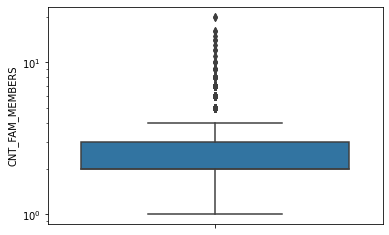

In [34]:
# CNT_FAM_MEMBERS
#0.000650%的缺失率
#CNT_FAM_MEMBERS的箱线图
sns.boxplot(y=application_data['CNT_FAM_MEMBERS'])
plt.yscale('log')
plt.show()
#由箱线图可以看出：存在较多异常值超出上限，因此使用中位数填充缺失值

In [35]:
#中位数填充缺失值
temp = application_data['CNT_FAM_MEMBERS'].median()
application_data['CNT_FAM_MEMBERS'].fillna(value=temp,inplace=True)

<AxesSubplot:ylabel='OBS_30_CNT_SOCIAL_CIRCLE'>

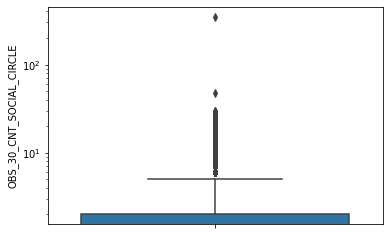

In [36]:
#OBS_30_CNT_SOCIAL_CIRCLE
#0.332021%的缺失率
#'OBS_30_CNT_SOCIAL_CIRCLE'的箱线图
sns.boxplot(y=application_data['OBS_30_CNT_SOCIAL_CIRCLE'])
plt.yscale('log')
plt.show()
#使用平均数填充缺失值

In [37]:
#平均数填充缺失值
temp = application_data['OBS_30_CNT_SOCIAL_CIRCLE'].mean()
application_data['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(value=temp,inplace=True)

<AxesSubplot:ylabel='DEF_30_CNT_SOCIAL_CIRCLE'>

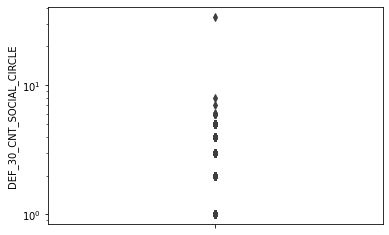

In [38]:
# DEF_30_CNT_SOCIAL_CIRCLE
#0.332021%
#'DEF_30_CNT_SOCIAL_CIRCLE'的箱线图
sns.boxplot(y=application_data['DEF_30_CNT_SOCIAL_CIRCLE'])
plt.yscale('log')
plt.show()
#使用众数填充缺失值

In [39]:
#众数填充缺失值
temp = statistics.mode(application_data['DEF_30_CNT_SOCIAL_CIRCLE'])
application_data['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(value=temp,inplace=True)

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

<AxesSubplot:ylabel='OBS_60_CNT_SOCIAL_CIRCLE'>

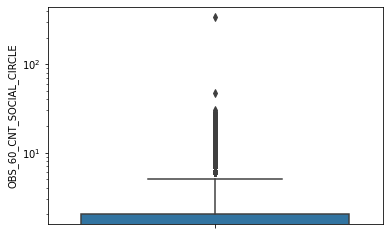

In [40]:
# OBS_60_CNT_SOCIAL_CIRCLE
application_data['OBS_60_CNT_SOCIAL_CIRCLE'].describe()

#0.332021%
#'OBS_60_CNT_SOCIAL_CIRCLE'的箱线图
sns.boxplot(y=application_data['OBS_60_CNT_SOCIAL_CIRCLE'])
plt.yscale('log')
plt.show()
#使用平均数填充缺失值

In [41]:
#平均数填充缺失值
temp = application_data['OBS_60_CNT_SOCIAL_CIRCLE'].mean()
application_data['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(value=temp,inplace=True)

count    306490.000000
mean          0.100049
std           0.362291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

<AxesSubplot:ylabel='DEF_60_CNT_SOCIAL_CIRCLE'>

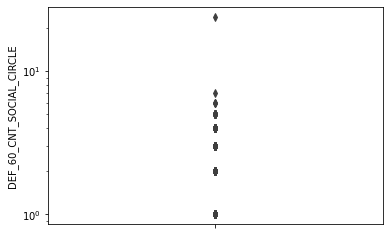

In [42]:
# DEF_60_CNT_SOCIAL_CIRCLE
application_data['DEF_60_CNT_SOCIAL_CIRCLE'].describe()

#0.332021%
#'DEF_60_CNT_SOCIAL_CIRCLE'的箱线图
sns.boxplot(y=application_data['DEF_60_CNT_SOCIAL_CIRCLE'])
plt.yscale('log')
plt.show()
#使用众数填充缺失值

In [43]:
#众数填充缺失值
temp = statistics.mode(application_data['DEF_60_CNT_SOCIAL_CIRCLE'])
application_data['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(value=temp,inplace=True)

count    307510.000000
mean       -962.858788
std         826.808487
min       -4292.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

<AxesSubplot:ylabel='DAYS_LAST_PHONE_CHANGE'>

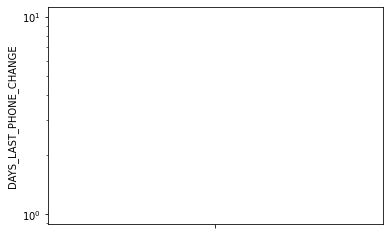

In [44]:
# DAYS_LAST_PHONE_CHANGE
application_data['DAYS_LAST_PHONE_CHANGE'].describe()

#0.000325%
#'DAYS_LAST_PHONE_CHANGE'的箱线图
sns.boxplot(y=application_data['DAYS_LAST_PHONE_CHANGE'])
plt.yscale('log')
plt.show()
#使用众数填充缺失值

In [45]:
#众数填充缺失值
temp = statistics.mode(application_data['DAYS_LAST_PHONE_CHANGE'])
application_data['DAYS_LAST_PHONE_CHANGE'].fillna(value=temp,inplace=True)

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

<AxesSubplot:ylabel='AMT_REQ_CREDIT_BUREAU_HOUR'>

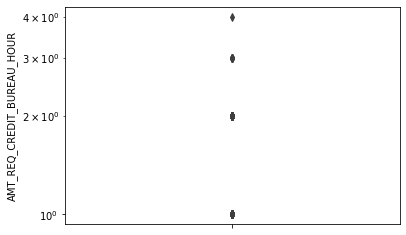

In [46]:
# AMT_REQ_CREDIT_BUREAU_HOUR
application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].describe()
#13.501631%
#'AMT_REQ_CREDIT_BUREAU_HOUR'的箱线图
sns.boxplot(y=application_data['AMT_REQ_CREDIT_BUREAU_HOUR'])
plt.yscale('log')
plt.show()
#使用众数填充缺失值

In [47]:
#众数填充缺失值
temp = statistics.mode(application_data['AMT_REQ_CREDIT_BUREAU_HOUR'])
application_data['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(value=temp,inplace=True)

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

<AxesSubplot:ylabel='AMT_REQ_CREDIT_BUREAU_DAY'>

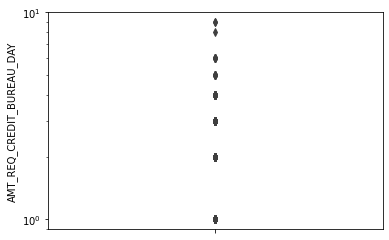

In [48]:
# AMT_REQ_CREDIT_BUREAU_DAY
application_data['AMT_REQ_CREDIT_BUREAU_DAY'].describe()
#13.501631%
#'AMT_REQ_CREDIT_BUREAU_DAY'的箱线图
sns.boxplot(y=application_data['AMT_REQ_CREDIT_BUREAU_DAY'])
plt.yscale('log')
plt.show()
#使用众数填充缺失值

In [49]:
#众数填充缺失值
temp = statistics.mode(application_data['AMT_REQ_CREDIT_BUREAU_DAY'])
application_data['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(value=temp,inplace=True)

count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

<AxesSubplot:ylabel='AMT_REQ_CREDIT_BUREAU_WEEK'>

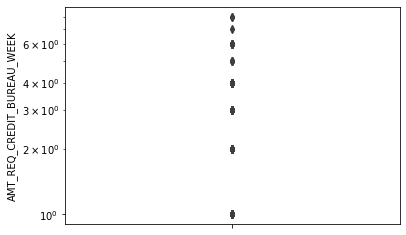

In [50]:
# AMT_REQ_CREDIT_BUREAU_WEEK
application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].describe()

#13.501631%
#'AMT_REQ_CREDIT_BUREAU_WEEK'的箱线图
sns.boxplot(y=application_data['AMT_REQ_CREDIT_BUREAU_WEEK'])
plt.yscale('log')
plt.show()
#使用众数填充缺失值

In [51]:
#众数填充缺失值
temp = statistics.mode(application_data['AMT_REQ_CREDIT_BUREAU_WEEK'])
application_data['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(value=temp,inplace=True)

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

<AxesSubplot:ylabel='AMT_REQ_CREDIT_BUREAU_MON'>

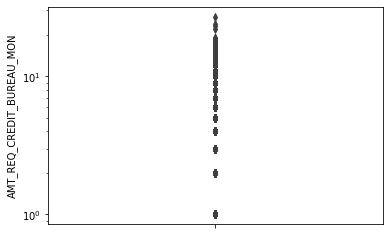

In [52]:
# AMT_REQ_CREDIT_BUREAU_MON
application_data['AMT_REQ_CREDIT_BUREAU_MON'].describe()
#13.501631%
#'AMT_REQ_CREDIT_BUREAU_MON'的箱线图
sns.boxplot(y=application_data['AMT_REQ_CREDIT_BUREAU_MON'])
plt.yscale('log')
plt.show()
#使用众数填充缺失值


In [53]:
#众数填充缺失值
temp = statistics.mode(application_data['AMT_REQ_CREDIT_BUREAU_MON'])
application_data['AMT_REQ_CREDIT_BUREAU_MON'].fillna(value=temp,inplace=True)

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

<AxesSubplot:ylabel='AMT_REQ_CREDIT_BUREAU_QRT'>

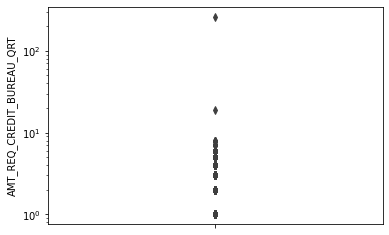

In [54]:
# AMT_REQ_CREDIT_BUREAU_QRT
application_data['AMT_REQ_CREDIT_BUREAU_QRT'].describe()

#13.501631%
#'AMT_REQ_CREDIT_BUREAU_QRT'的箱线图
sns.boxplot(y=application_data['AMT_REQ_CREDIT_BUREAU_QRT'])
plt.yscale('log')
plt.show()
#使用众数填充缺失值

In [55]:
#众数填充缺失值
temp = statistics.mode(application_data['AMT_REQ_CREDIT_BUREAU_QRT'])
application_data['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(value=temp,inplace=True)

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

<AxesSubplot:ylabel='AMT_REQ_CREDIT_BUREAU_YEAR'>

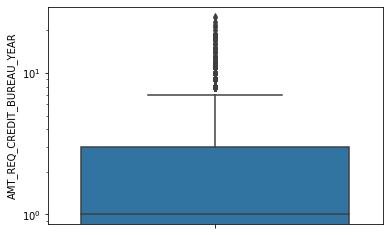

In [56]:
# AMT_REQ_CREDIT_BUREAU_YEAR
application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].describe()
#13.501631%
#'AMT_REQ_CREDIT_BUREAU_YEAR'的箱线图
sns.boxplot(y=application_data['AMT_REQ_CREDIT_BUREAU_YEAR'])
plt.yscale('log')
plt.show()
#使用平均数填充缺失值

In [57]:
#平均数填充缺失值
temp = application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].mean()
application_data['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(value=temp,inplace=True)

# 异常值处理

In [58]:
#定义可视化异常值的函数
def GraphOutliers(col,titl,zoom) : 
    plt.figure(figsize=(15,8))
    plt.subplot(2,2,1)
    sns.boxplot(y=application_data[col])
    plt.title(titl)
    
    #draw distplot
    plt.subplot(2,2,2) 
    sns.distplot(application_data[col])
    
    # After removing outliers
    plt.subplot(2,2,3)
    sns.boxplot(application_data[application_data[col]<zoom][col])
    plt.title(titl)
    plt.show()

In [59]:
#获取AMT开头的列
list = [col for col in application_data.columns if col.startswith('AMT')]
list

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

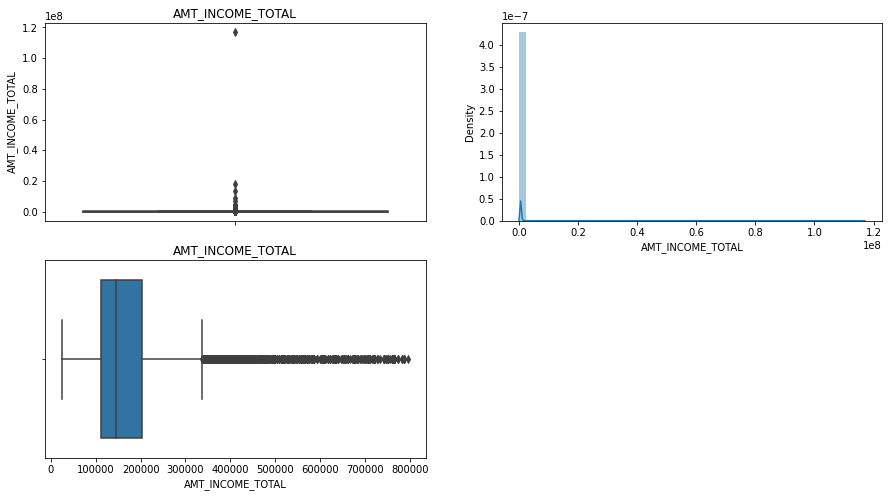

In [60]:
GraphOutliers('AMT_INCOME_TOTAL','AMT_INCOME_TOTAL',800000)

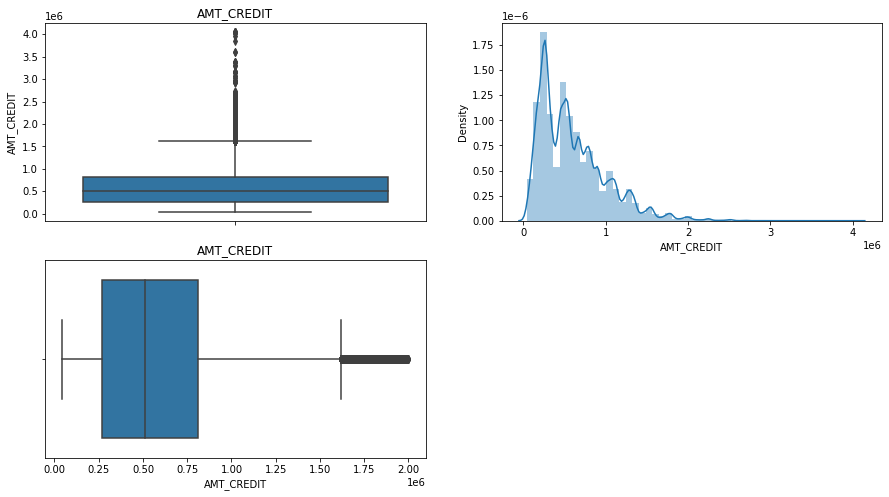

In [61]:
GraphOutliers('AMT_CREDIT','AMT_CREDIT',2000000)

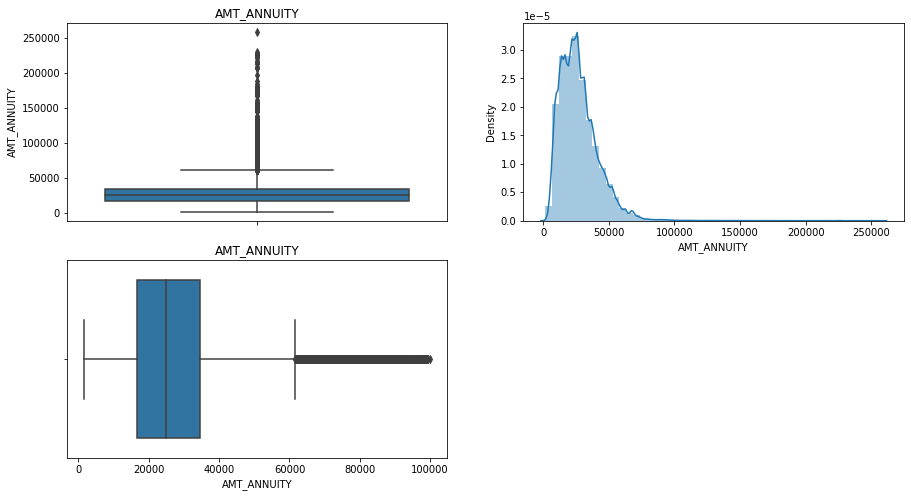

In [62]:
GraphOutliers('AMT_ANNUITY','AMT_ANNUITY',100000)

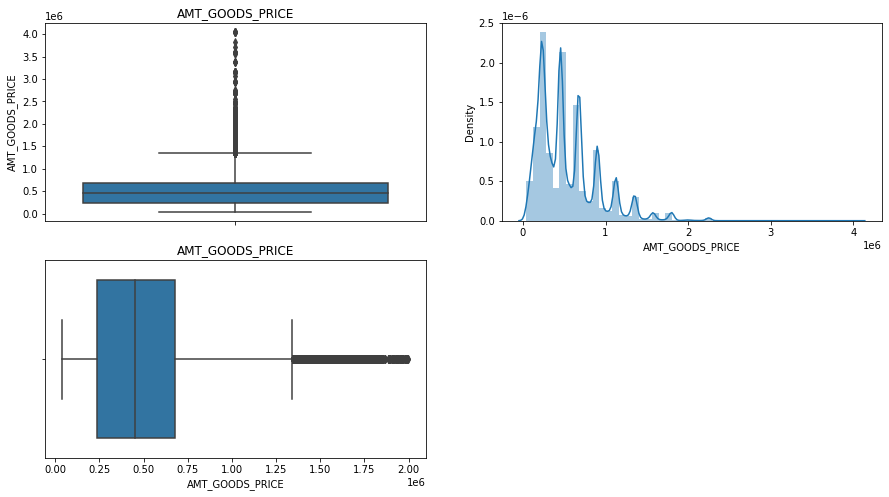

In [63]:
GraphOutliers('AMT_GOODS_PRICE','AMT_GOODS_PRICE',2000000)

In [64]:
# 删除异常值
#AMT_INCOME_TOTAL<=800000
#AMT_CREDIT<=2000000
#AMT_ANNUITY<=100000
#AMT_GOODS_PRICE<=2000000
application_data=application_data[application_data.AMT_INCOME_TOTAL<=800000]
application_data=application_data[application_data.AMT_CREDIT<=2000000]
application_data=application_data[application_data.AMT_ANNUITY<=100000]
application_data=application_data[application_data.AMT_GOODS_PRICE<=2000000]
application_data=application_data[application_data.CODE_GENDER!= "XNA"]

# 目标变量分析

In [65]:
#分析目标变量
application_data.TARGET.value_counts()

#目标变量的占比
application_data.TARGET.value_counts(normalize=True)

0    279904
1     24722
Name: TARGET, dtype: int64

0    0.918845
1    0.081155
Name: TARGET, dtype: float64

In [66]:
#将处理后的数据保存一下
application_data.to_csv('application_data_imputation.csv',index=False)
application_data_imputation = pd.read_csv('application_data_imputation.csv')

In [67]:
application_data_imputation.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.0,2.0,-1134.0,1,0.0,0.0,0.0,0.0,0.0,1.000000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1.0,0.0,-828.0,1,0.0,0.0,0.0,0.0,0.0,0.000000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.0,0.0,-815.0,0,0.0,0.0,0.0,0.0,0.0,0.000000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2.0,0.0,-617.0,1,0.0,0.0,0.0,0.0,0.0,1.899974
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.0,0.0,-1106.0,0,0.0,0.0,0.0,0.0,0.0,0.000000


# 特征分组

In [68]:
# 将非数值型特征进行转换为编号
for col in application_data_imputation.select_dtypes(include=object).columns.tolist() :
    ratios = application_data_imputation.groupby(col).apply(lambda x: x['TARGET'].sum() / x['TARGET'].count()).reset_index()
    ratios.columns = [col, 'TEMP']
    ratios=ratios.sort_values(by = 'TEMP')
    liste=ratios[col].values.tolist()
    application_data_imputation['X_'+ col] = application_data_imputation[col].astype('category')
    application_data_imputation['X_'+ col] = application_data_imputation['X_'+ col].cat.reorder_categories(liste,ordered=True)
    application_data_imputation['X_'+ col] = application_data_imputation['X_'+ col].cat.codes
    print('X_'+ col)

X_NAME_CONTRACT_TYPE
X_CODE_GENDER
X_FLAG_OWN_CAR
X_FLAG_OWN_REALTY
X_NAME_TYPE_SUITE
X_NAME_INCOME_TYPE
X_NAME_EDUCATION_TYPE
X_NAME_FAMILY_STATUS
X_NAME_HOUSING_TYPE
X_OCCUPATION_TYPE
X_WEEKDAY_APPR_PROCESS_START
X_ORGANIZATION_TYPE


In [69]:
# 使用决策树的方式对数值型变量进行分箱
from sklearn.tree import DecisionTreeClassifier, plot_tree

for col in application_data_imputation.select_dtypes(include=np.number).columns.tolist() :
    clf = DecisionTreeClassifier(max_depth=2)
    clf.fit(pd.DataFrame(application_data_imputation[col]), pd.DataFrame(application_data_imputation['TARGET']))
    #plot_tree(clf)
    #plt.show()
    #返回每个测试样本所在的叶子节点的索引
    application_data_imputation['CAT_' + col]=clf.apply(pd.DataFrame(application_data_imputation[col]))
    application_data_imputation['CAT_' + col] = application_data_imputation['CAT_' + col].astype(str)
    print('CAT_' + col)

DecisionTreeClassifier(max_depth=2)

CAT_SK_ID_CURR


DecisionTreeClassifier(max_depth=2)

CAT_TARGET


DecisionTreeClassifier(max_depth=2)

CAT_CNT_CHILDREN


DecisionTreeClassifier(max_depth=2)

CAT_AMT_INCOME_TOTAL


DecisionTreeClassifier(max_depth=2)

CAT_AMT_CREDIT


DecisionTreeClassifier(max_depth=2)

CAT_AMT_ANNUITY


DecisionTreeClassifier(max_depth=2)

CAT_AMT_GOODS_PRICE


DecisionTreeClassifier(max_depth=2)

CAT_REGION_POPULATION_RELATIVE


DecisionTreeClassifier(max_depth=2)

CAT_DAYS_BIRTH


DecisionTreeClassifier(max_depth=2)

CAT_DAYS_EMPLOYED


DecisionTreeClassifier(max_depth=2)

CAT_DAYS_REGISTRATION


DecisionTreeClassifier(max_depth=2)

CAT_DAYS_ID_PUBLISH


DecisionTreeClassifier(max_depth=2)

CAT_CNT_FAM_MEMBERS


DecisionTreeClassifier(max_depth=2)

CAT_REGION_RATING_CLIENT


DecisionTreeClassifier(max_depth=2)

CAT_REGION_RATING_CLIENT_W_CITY


DecisionTreeClassifier(max_depth=2)

CAT_HOUR_APPR_PROCESS_START


DecisionTreeClassifier(max_depth=2)

CAT_REG_REGION_NOT_LIVE_REGION


DecisionTreeClassifier(max_depth=2)

CAT_REG_REGION_NOT_WORK_REGION


DecisionTreeClassifier(max_depth=2)

CAT_LIVE_REGION_NOT_WORK_REGION


DecisionTreeClassifier(max_depth=2)

CAT_REG_CITY_NOT_LIVE_CITY


DecisionTreeClassifier(max_depth=2)

CAT_REG_CITY_NOT_WORK_CITY


DecisionTreeClassifier(max_depth=2)

CAT_LIVE_CITY_NOT_WORK_CITY


DecisionTreeClassifier(max_depth=2)

CAT_EXT_SOURCE_2


DecisionTreeClassifier(max_depth=2)

CAT_EXT_SOURCE_3


DecisionTreeClassifier(max_depth=2)

CAT_OBS_30_CNT_SOCIAL_CIRCLE


DecisionTreeClassifier(max_depth=2)

CAT_DEF_30_CNT_SOCIAL_CIRCLE


DecisionTreeClassifier(max_depth=2)

CAT_OBS_60_CNT_SOCIAL_CIRCLE


DecisionTreeClassifier(max_depth=2)

CAT_DEF_60_CNT_SOCIAL_CIRCLE


DecisionTreeClassifier(max_depth=2)

CAT_DAYS_LAST_PHONE_CHANGE


DecisionTreeClassifier(max_depth=2)

CAT_FLAG_DOCUMENT_3


DecisionTreeClassifier(max_depth=2)

CAT_AMT_REQ_CREDIT_BUREAU_HOUR


DecisionTreeClassifier(max_depth=2)

CAT_AMT_REQ_CREDIT_BUREAU_DAY


DecisionTreeClassifier(max_depth=2)

CAT_AMT_REQ_CREDIT_BUREAU_WEEK


DecisionTreeClassifier(max_depth=2)

CAT_AMT_REQ_CREDIT_BUREAU_MON


DecisionTreeClassifier(max_depth=2)

CAT_AMT_REQ_CREDIT_BUREAU_QRT


DecisionTreeClassifier(max_depth=2)

CAT_AMT_REQ_CREDIT_BUREAU_YEAR


DecisionTreeClassifier(max_depth=2)

CAT_X_NAME_CONTRACT_TYPE


DecisionTreeClassifier(max_depth=2)

CAT_X_CODE_GENDER


DecisionTreeClassifier(max_depth=2)

CAT_X_FLAG_OWN_CAR


DecisionTreeClassifier(max_depth=2)

CAT_X_FLAG_OWN_REALTY


DecisionTreeClassifier(max_depth=2)

CAT_X_NAME_TYPE_SUITE


DecisionTreeClassifier(max_depth=2)

CAT_X_NAME_INCOME_TYPE


DecisionTreeClassifier(max_depth=2)

CAT_X_NAME_EDUCATION_TYPE


DecisionTreeClassifier(max_depth=2)

CAT_X_NAME_FAMILY_STATUS


DecisionTreeClassifier(max_depth=2)

CAT_X_NAME_HOUSING_TYPE


DecisionTreeClassifier(max_depth=2)

CAT_X_OCCUPATION_TYPE


DecisionTreeClassifier(max_depth=2)

CAT_X_WEEKDAY_APPR_PROCESS_START


DecisionTreeClassifier(max_depth=2)

CAT_X_ORGANIZATION_TYPE


In [70]:
#检查一个特征的分箱结果
pd.crosstab([application_data_imputation["CAT_X_NAME_INCOME_TYPE"],application_data_imputation["X_NAME_INCOME_TYPE"],application_data_imputation["NAME_INCOME_TYPE"]],
            application_data_imputation["TARGET"], margins=True)

TARGET                                                               0      1  \
CAT_X_NAME_INCOME_TYPE X_NAME_INCOME_TYPE NAME_INCOME_TYPE                      
2                      0                  Businessman                6      0   
                       1                  Student                   18      0   
                       2                  Pensioner              52077   2976   
                       3                  State servant          20147   1242   
3                      4                  Commercial associate   64949   5307   
5                      5                  Working               142690  15187   
6                      6                  Unemployed                14      8   
                       7                  Maternity leave            3      2   
All                                                             279904  24722   

TARGET                                                             All  
CAT_X_NAME_INCOME_TYPE X_NAME_INCOME_TYPE NAME_INCOME_TYPE              
2                      0                  Businessman                6  
                       1                  Student                   18  
                       2                  Pensioner              55053  
                       3                  State servant          21389  
3                      4                  Commercial associate   70256  
5                      5                  Working               157877  
6                      6                  Unemployed                22  
                       7                  Maternity leave            5  
All                                                             304626

# 特征分析和衍生

家庭相关：

CNT_CHILDREN

NAME_TYPE_SUITE

NAME_FAMILY_STATUS

CNT_FAM_MEMBERS

X_NAME_TYPE_SUITE

X_NAME_FAMILY_STATUS

CAT_CNT_CHILDREN

CAT_CNT_FAM_MEMBERS

CAT_X_NAME_TYPE_SUITE

CAT_X_NAME_FAMILY_STATUS

In [71]:
aggregations = {'TARGET': [sum,'count',"mean"]}
application_data_imputation.groupby(["NAME_FAMILY_STATUS","CAT_X_NAME_FAMILY_STATUS",'CNT_CHILDREN','CAT_CNT_CHILDREN']).agg(aggregations).reset_index()

NAME_FAMILY_STATUS CAT_X_NAME_FAMILY_STATUS CNT_CHILDREN  \
                                                                 
0         Civil marriage                        6            0   
1         Civil marriage                        6            1   
2         Civil marriage                        6            2   
3         Civil marriage                        6            3   
4         Civil marriage                        6            4   
5         Civil marriage                        6            5   
6         Civil marriage                        6            6   
7         Civil marriage                        6            7   
8         Civil marriage                        6            9   
9                Married                        3            0   
10               Married                        3            1   
11               Married                        3            2   
12               Married                        3            3   
13               Married                        3            4   
14               Married                        3            5   
15               Married                        3            6   
16               Married                        3            7   
17               Married                        3            8   
18               Married                        3           10   
19               Married                        3           11   
20               Married                        3           12   
21               Married                        3           14   
22             Separated                        3            0   
23             Separated                        3            1   
24             Separated                        3            2   
25             Separated                        3            3   
26             Separated                        3            4   
27             Separated                        3            5   
28             Separated                        3            6   
29             Separated                        3           14   
30  Single / not married                        5            0   
31  Single / not married                        5            1   
32  Single / not married                        5            2   
33  Single / not married                        5            3   
34  Single / not married                        5            4   
35  Single / not married                        5            5   
36  Single / not married                        5            9   
37  Single / not married                        5           19   
38               Unknown                        2            0   
39                 Widow                        2            0   
40                 Widow                        2            1   
41                 Widow                        2            2   
42                 Widow                        2            3   
43                 Widow                        2            4   
44                 Widow                        2            5   
45                 Widow                        2            6   
46                 Widow                        2            7   

   CAT_CNT_CHILDREN TARGET                    
                       sum   count      mean  
0                 1   1999   20812  0.096050  
1                 3    677    6544  0.103454  
2                 3    223    1924  0.115904  
3                 3     35     259  0.135135  
4                 4     10      33  0.303030  
5                 4      0       5  0.000000  
6                 4      1       2  0.500000  
7                 4      0       1  0.000000  
8                 4      1       1  1.000000  
9                 1   8883  125128  0.070991  
10                3   3687   43243  0.085262  
11                3   1872   22254  0.084120  
12                3    287    3158  0.090880  
13                4     44     364  0.120879  
14                4

In [72]:
aggregations = {'TARGET': [sum,'count',"mean"],'CNT_CHILDREN': [min,max]}
application_data_imputation.groupby(["CAT_X_NAME_FAMILY_STATUS",'CAT_CNT_CHILDREN']).agg(aggregations).reset_index()

CAT_X_NAME_FAMILY_STATUS CAT_CNT_CHILDREN TARGET                    \
                                                sum   count      mean   
0                         2                1    849   14865  0.057114   
1                         2                3     84    1170  0.071795   
2                         2                4      0       9  0.000000   
3                         3                1   9971  139152  0.071655   
4                         3                3   6371   74227  0.085831   
5                         3                4     56     484  0.115702   
6                         5                1   3719   38545  0.096485   
7                         5                3    724    6580  0.110030   
8                         5                4      2      13  0.153846   
9                         6                1   1999   20812  0.096050   
10                        6                3    935    8727  0.107139   
11                        6                4     12      42  0.285714   

   CNT_CHILDREN      
            min max  
0             0   0  
1             1   3  
2             4   7  
3             0   0  
4             1   3  
5             4  14  
6             0   0  
7             1   3  
8             4  19  
9             0   0  
10            1   3  
11            4   9

In [73]:
#创建一个跨家庭状态和孩子数量的新类别为目标提供有关相关性的更多信息：CAT_NAME_FAMILY_STATUS_CHILD
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf = DecisionTreeClassifier(max_depth=4)
clf.fit(pd.DataFrame(application_data_imputation[["CAT_X_NAME_FAMILY_STATUS","CNT_CHILDREN"]]), pd.DataFrame(application_data_imputation['TARGET']))
#plot_tree(clf)
#plt.show()
application_data_imputation['CAT_NAME_FAMILY_STATUS_CHILD']=clf.apply(pd.DataFrame(application_data_imputation[["CAT_X_NAME_FAMILY_STATUS","CNT_CHILDREN"]]))

# Recoging due to low numbers
application_data_imputation["CAT_NAME_FAMILY_STATUS_CHILD"].loc[application_data_imputation["CAT_NAME_FAMILY_STATUS_CHILD"]==10]=8
application_data_imputation["CAT_NAME_FAMILY_STATUS_CHILD"].loc[application_data_imputation["CAT_NAME_FAMILY_STATUS_CHILD"]==11]=8

DecisionTreeClassifier(max_depth=4)

In [74]:
aggregations = {'TARGET': [sum,'count',"mean"]}
application_data_imputation.groupby(["CAT_CNT_FAM_MEMBERS","NAME_FAMILY_STATUS"]).agg(aggregations).reset_index()

CAT_CNT_FAM_MEMBERS    NAME_FAMILY_STATUS TARGET                  
                                                sum   count      mean
0                    2             Separated   1088   14024  0.077581
1                    2  Single / not married   3719   38545  0.096485
2                    2                 Widow    849   14863  0.057122
3                    3        Civil marriage   1999   20812  0.096050
4                    3               Married   8883  125128  0.070991
5                    3             Separated    409    4349  0.094045
6                    3  Single / not married    605    5542  0.109166
7                    3               Unknown      0       2  0.000000
8                    3                 Widow     58     866  0.066975
9                    5        Civil marriage    935    8727  0.107139
10                   5               Married   5846   68655  0.085150
11                   5             Separated    116    1235  0.093927
12                   5  Single / not married    120    1047  0.114613
13                   5                 Widow     26     309  0.084142
14                   6        Civil marriage     12      42  0.285714
15                   6               Married     55     468  0.117521
16                   6             Separated      1       4  0.250000
17                   6  Single / not married      1       4  0.250000
18                   6                 Widow      0       4  0.000000

In [75]:
aggregations = {'TARGET': [sum,'count',"mean"],'CNT_FAM_MEMBERS': [min,"mean",max] }
application_data_imputation.groupby(["NAME_FAMILY_STATUS","CNT_CHILDREN"]).agg(aggregations).reset_index()

NAME_FAMILY_STATUS CNT_CHILDREN TARGET                    \
                                         sum   count      mean   
0         Civil marriage            0   1999   20812  0.096050   
1         Civil marriage            1    677    6544  0.103454   
2         Civil marriage            2    223    1924  0.115904   
3         Civil marriage            3     35     259  0.135135   
4         Civil marriage            4     10      33  0.303030   
5         Civil marriage            5      0       5  0.000000   
6         Civil marriage            6      1       2  0.500000   
7         Civil marriage            7      0       1  0.000000   
8         Civil marriage            9      1       1  1.000000   
9                Married            0   8883  125128  0.070991   
10               Married            1   3687   43243  0.085262   
11               Married            2   1872   22254  0.084120   
12               Married            3    287    3158  0.090880   
13               Married            4     44     364  0.120879   
14               Married            5      5      73  0.068493   
15               Married            6      5      17  0.294118   
16               Married            7      0       5  0.000000   
17               Married            8      0       2  0.000000   
18               Married           10      0       2  0.000000   
19               Married           11      1       1  1.000000   
20               Married           12      0       2  0.000000   
21               Married           14      0       2  0.000000   
22             Separated            0   1088   14024  0.077581   
23             Separated            1    409    4349  0.094045   
24             Separated            2    105    1101  0.095368   
25             Separated            3     11     122  0.090164   
26             Separated            4      0      12  0.000000   
27             Separated            5      1       2  0.500000   
28             Separated            6      0       1  0.000000   
29             Separated           14      0       1  0.000000   
30  Single / not married            0   3719   38545  0.096485   
31  Single / not married            1    605    5542  0.109166   
32  Single / not married            2    106     954  0.111111   
33  Single / not married            3     13      84  0.154762   
34  Single / not married            4      1       9  0.111111   
35  Single / not married            5      0       1  0.000000   
36  Single / not married            9      1       1  1.000000   
37  Single / not married           19      0       2  0.000000   
38               Unknown            0      0       2  0.000000   
39                 Widow            0    849   14863  0.057122   
40                 Widow            1     58     866  0.066975   
41                 Widow            2     18     246  0.073171   
42                 Widow            3      8      58  0.137931   
43                 Widow            4      0       5  0.000000   
44                 Widow            5      0       2  0.000000   
45                 Widow            6      0       1  0.000000   
46                 Widow            7      0       1  0.000000   

   CNT_FAM_MEMBERS              
               min  mean   max  
0              2.0   2.0   2.0  
1              3.0   3.0   3.0  
2              4.0   4.0   4.0  
3              5.0   5.0   5.0  
4              6.0   6.0   6.0  
5              7.0   7.0   7.0  
6              8.0   8.0   8.0  
7              9.0   9.0   9.0  
8             11.0  11.0  11.0  
9              2.0   2.0   2.0  
10             3.0   3.0   3.0  
11             4.0   4.0   4.0  
12             5.0   5.0   5.0  
13             6.0   6.0   6.0  
14             7.0   7.0   7.0  
15             8.0   8.0   8.0  
16             9.0   9.0   9.0  
17            10.0  10.0  10.0  
18            12.0  12.0  12.0  
19            13.0  13.0  13.0  
20            14.0  14.0  14.0  
21          

通过交叉家庭状况和孩子的数量来检查CNT_FAM_MEMBERS的一致性，该字段一致。

DecisionTreeClassifier(max_depth=6)

[Text(163.4765625, 201.90857142857143, 'X[0] <= 4.0\ngini = 0.149\nsamples = 304626\nvalue = [279904, 24722]'),
 Text(74.98125, 170.84571428571428, 'X[2] <= 0.5\ngini = 0.139\nsamples = 229907\nvalue = [212576, 17331]'),
 Text(27.900000000000002, 139.78285714285715, 'X[0] <= 2.5\ngini = 0.131\nsamples = 154017\nvalue = [143197, 10820]'),
 Text(13.950000000000001, 108.72, 'X[1] <= 1.5\ngini = 0.108\nsamples = 14865\nvalue = [14016, 849]'),
 Text(6.9750000000000005, 77.65714285714284, 'gini = 0.108\nsamples = 14863\nvalue = [14014, 849]'),
 Text(20.925, 77.65714285714284, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(41.85, 108.72, 'X[1] <= 1.5\ngini = 0.133\nsamples = 139152\nvalue = [129181, 9971]'),
 Text(34.875, 77.65714285714284, 'gini = 0.143\nsamples = 14024\nvalue = [12936, 1088]'),
 Text(48.825, 77.65714285714284, 'gini = 0.132\nsamples = 125128\nvalue = [116245, 8883]'),
 Text(122.06250000000001, 139.78285714285715, 'X[1] <= 5.5\ngini = 0.157\nsamples = 75890\nvalue = [6937

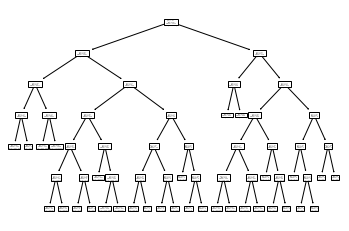

In [76]:
#创建一个名为 CAT_NAME_FAMILY_STATUS_MEMBERS 的新字段，跨越 NAME_FAMILY_STATUS、CNT_FAM_MEMBERS 和 CNT_CHILDREN。
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf = DecisionTreeClassifier(max_depth=6)
clf.fit(pd.DataFrame(application_data_imputation[["CAT_X_NAME_FAMILY_STATUS","CNT_FAM_MEMBERS","CNT_CHILDREN"]]), pd.DataFrame(application_data_imputation['TARGET']))
plot_tree(clf)
plt.show()
application_data_imputation['CAT_NAME_FAMILY_STATUS_MEMBERS']=clf.apply(pd.DataFrame(application_data_imputation[["CAT_X_NAME_FAMILY_STATUS","CNT_FAM_MEMBERS","CNT_CHILDREN"]]))

In [77]:
aggregations = {'TARGET': [sum,'count',"mean"],'CNT_FAM_MEMBERS': [min,"mean",max],'CNT_CHILDREN': [min,"mean",max]}
application_data_imputation.groupby(["CAT_NAME_FAMILY_STATUS_MEMBERS","NAME_FAMILY_STATUS"]).agg(aggregations).reset_index()

CAT_NAME_FAMILY_STATUS_MEMBERS    NAME_FAMILY_STATUS TARGET          \
                                                           sum   count   
0                               4                 Widow    849   14863   
1                               5               Unknown      0       2   
2                               7             Separated   1088   14024   
3                               8               Married   8883  125128   
4                              13                 Widow     58     866   
5                              14                 Widow     18     246   
6                              16                 Widow      8      58   
7                              17                 Widow      0       5   
8                              19             Separated    409    4349   
9                              21               Married   5559   65497   
10                             21             Separated    105    1101   
11                             22               Married    287    3158   
12                             22             Separated     11     134   
13                             26               Married     44     364   
14                             27             Separated      1       2   
15                             27                 Widow      0       2   
16                             29               Married      5      73   
17                             30             Separated      0       1   
18                             30                 Widow      0       1   
19                             32               Married      5      17   
20                             34               Married      0       9   
21                             34                 Widow      0       1   
22                             35               Married      1       5   
23                             35             Separated      0       1   
24                             38  Single / not married   3719   38545   
25                             39        Civil marriage   1999   20812   
26                             44  Single / not married    605    5542   
27                             45        Civil marriage    677    6544   
28                             47  Single / not married    106     954   
29                             48        Civil marriage    223    1924   
30                             50  Single / not married     13      84   
31                             52        Civil marriage     35     259   
32                             53  Single / not married      1       9   
33                             56        Civil marriage     10      33   
34                             58        Civil marriage      0       5   
35                             58  Single / not married      0       1   
36                             59        Civil marriage      1       3   
37                             61        Civil marriage      1       1   
38                             61  Single / not married      1       1   
39                             62  Single / not married      0       2   

             CNT_FAM_MEMBERS                  CNT_CHILDREN                 
        mean             min       mean   max          min       mean max  
0   0.057122             1.0   1.000000   1.0            0   0.000000   0  
1   0.000000             2.0   2.000000   2.0            0   0.000000   0  
2   0.077581             1.0   1.000000   1.0            0   0.000000   0  
3   0.070991             2.0   2.000000   2.0            0   0.000000   0  
4   0.066975             2.0   2.000000   2.0            1   1.000000   1  
5   0.073171             3.0   3.000000   3.0            2   2.000000   2  
6   0.137931             4.0   4.000000   4.0            3   3.000000   3  
7   0.000000             5.0   5.000000   5.0            4   4.000000   4  
8   0.094045             2.0   2.000000   2.0            1   1.000000   1  
9   0.084874             3.0   3.339771   4.0            1

In [78]:
contact_col = ['CNT_CHILDREN','CNT_FAM_MEMBERS','X_NAME_FAMILY_STATUS',
               'CAT_CNT_CHILDREN','CAT_CNT_FAM_MEMBERS','CAT_X_NAME_FAMILY_STATUS',
                'CAT_NAME_FAMILY_STATUS_CHILD','CAT_NAME_FAMILY_STATUS_MEMBERS','TARGET']
application_data_imputation_contact = application_data_imputation.loc[:,contact_col] 
application_data_imputation_contact = application_data_imputation_contact.astype(float)
application_data_imputation_contact_corr = application_data_imputation_contact.corr()
application_data_imputation_contact_corr

,CNT_CHILDREN,CNT_FAM_MEMBERS,X_NAME_FAMILY_STATUS,CAT_CNT_CHILDREN,CAT_CNT_FAM_MEMBERS,CAT_X_NAME_FAMILY_STATUS,CAT_NAME_FAMILY_STATUS_CHILD,CAT_NAME_FAMILY_STATUS_MEMBERS,TARGET
CNT_CHILDREN,1.000000,0.879005,-0.086517,0.890361,0.814749,-0.081381,0.229889,0.262731,0.019224
CNT_FAM_MEMBERS,0.879005,1.000000,-0.216483,0.791023,0.933485,-0.165130,0.032237,0.065778,0.009492
X_NAME_FAMILY_STATUS,-0.086517,-0.216483,1.000000,-0.070158,-0.200668,0.975493,0.882239,0.863309,0.039015
CAT_CNT_CHILDREN,0.890361,0.791023,-0.070158,1.000000,0.876552,-0.068010,0.283358,0.306156,0.020680
CAT_CNT_FAM_MEMBERS,0.814749,0.933485,-0.200668,0.876552,1.000000,-0.152305,0.083045,0.115432,0.011034
CAT_X_NAME_FAMILY_STATUS,-0.081381,-0.165130,0.975493,-0.068010,-0.152305,1.000000,0.910831,0.896064,0.038634
CAT_NAME_FAMILY_STATUS_CHILD,0.229889,0.032237,0.882239,0.283358,0.083045,0.910831,1.000000,0.995613,0.044468
CAT_NAME_FAMILY_STATUS_MEMBERS,0.262731,0.065778,0.863309,0.306156,0.115432,0.896064,0.995613,1.000000,0.044901
TARGET,0.019224,0.009492,0.039015,0.020680,0.011034,0.038634,0.044468,0.044901,1.000000


In [79]:
application_data_imputation_contact_corr = application_data_imputation_contact_corr.where(np.triu(np.ones(application_data_imputation_contact_corr.shape),k=1).astype(np.bool))
application_data_imputation_contact_corr = application_data_imputation_contact_corr.unstack().reset_index()
application_data_imputation_contact_corr.columns =['VAR1','VAR2','Correlation']
application_data_imputation_contact_corr.dropna(subset = ["Correlation"], inplace = True)
application_data_imputation_contact_corr["Correlation"]=application_data_imputation_contact_corr["Correlation"].abs() 
application_data_imputation_contact_corr.sort_values(by='Correlation', ascending=False, inplace=True) 
application_data_imputation_contact_corr

,VAR1,VAR2,Correlation
69,CAT_NAME_FAMILY_STATUS_MEMBERS,CAT_NAME_FAMILY_STATUS_CHILD,0.995613
47,CAT_X_NAME_FAMILY_STATUS,X_NAME_FAMILY_STATUS,0.975493
37,CAT_CNT_FAM_MEMBERS,CNT_FAM_MEMBERS,0.933485
59,CAT_NAME_FAMILY_STATUS_CHILD,CAT_X_NAME_FAMILY_STATUS,0.910831
68,CAT_NAME_FAMILY_STATUS_MEMBERS,CAT_X_NAME_FAMILY_STATUS,0.896064
27,CAT_CNT_CHILDREN,CNT_CHILDREN,0.890361
56,CAT_NAME_FAMILY_STATUS_CHILD,X_NAME_FAMILY_STATUS,0.882239
9,CNT_FAM_MEMBERS,CNT_CHILDREN,0.879005
39,CAT_CNT_FAM_MEMBERS,CAT_CNT_CHILDREN,0.876552
65,CAT_NAME_FAMILY_STATUS_MEMBERS,X_NAME_FAMILY_STATUS,0.863309


Target和CAT_NAME_FAMILY_STATUS_MEMBERS、Target和CAT_NAME_FAMILY_STATUS_CHILD相关性相同

选择保留 CAT_NAME_FAMILY_STATUS_CHILD。

住址相关：
FLAG_OWN_REALTY：是否拥有房子或公寓；

NAME_HOUSING_TYPE：住房情况； 

REGION_POPULATION_RELATIVE：居住地标准化人口； 

REGION_RATING_CLIENT：居住地的评级； 

REGION_RATING_CLIENT_W_CITY：考虑城市，居住地评级； 

X_FLAG_OWN_REALTY；

X_NAME_HOUSING_TYPE； 

CAT_REGION_POPULATION_RELATIVE； 

CAT_REGION_RATING_CLIENT； 

CAT_REGION_RATING_CLIENT_W_CITY； 

CAT_X_FLAG_OWN_REALTY； 

CAT_X_NAME_HOUSING_TYPE

In [80]:
def TestHomog (col) : 
    aggregations = {'TARGET': [sum,'count'],}
    res=application_data_imputation.groupby(col).agg(aggregations).reset_index()
    nobstot = res.iloc[:,-1]
    nobs=res.iloc[:,-2]
    #Test proportions 
    from statsmodels.stats.proportion import proportions_ztest
    stat, pval = proportions_ztest(nobs, nobstot)
    if nobstot[0]<30 or nobstot[1]<30 or nobs[0]/nobstot[0]*nobstot[0]<5 or nobs[1]/nobstot[1]*nobstot[1]<5 or (1-nobs[0]/nobstot[0])*nobstot[0]<5 or (1-nobs[1]/nobstot[1])*nobstot[1]<5 :
        concl = 'At least one condition not verified to do the test' 
    elif pval<0.05 : 
        concl = 'H0 rejection : Proportions are different' 
    else : 
        concl = 'Non H0 rejection : Impossible to determine a difference' 
    print("z=" + str(stat) + " et p=" + str(pval) + "\nConclusion : " + concl)

In [81]:
#CAT_REGION_POPULATION_RELATIVE的逻辑分组
aggregations = {'TARGET': [sum,'count',"mean"]}
application_data_imputation.groupby(["CAT_REGION_POPULATION_RELATIVE"]).agg(aggregations).reset_index()
#未能提供更重要的信息

CAT_REGION_POPULATION_RELATIVE TARGET                  
                                    sum   count      mean
0                              2  16449  185967  0.088451
1                              3   5847   74853  0.078113
2                              5   1443   22735  0.063470
3                              6    983   21071  0.046652

In [82]:
#CAT_REGION_RATING_CLIENT的逻辑分组
aggregations = {'TARGET': [sum,'count',"mean"]}
application_data_imputation.groupby(["CAT_REGION_RATING_CLIENT"]).agg(aggregations).reset_index()
#未能提供更重要的信息

CAT_REGION_RATING_CLIENT TARGET                  
                              sum   count      mean
0                        2   1530   31188  0.049057
1                        3  17842  225393  0.079160
2                        4   5350   48045  0.111354

In [83]:
#FLAG_OWN_REALTY的逻辑分组
aggregations = {'TARGET': [sum,'count',"mean"]}
application_data_imputation.groupby(["FLAG_OWN_REALTY"]).agg(aggregations).reset_index()

FLAG_OWN_REALTY TARGET                  
                     sum   count      mean
0               N   7799   93010  0.083851
1               Y  16923  211616  0.079970

In [84]:
TestHomog('FLAG_OWN_REALTY')
#测试显示有差异

z=3.612483558701032 et p=0.00030327834132022613
Conclusion : H0 rejection : Proportions are different


In [85]:
aggregations = {'TARGET': [sum,'count',"mean"]}
application_data_imputation.groupby(["CAT_X_NAME_HOUSING_TYPE","NAME_HOUSING_TYPE"]).agg(aggregations).reset_index()

CAT_X_NAME_HOUSING_TYPE    NAME_HOUSING_TYPE TARGET                  
                                                  sum   count      mean
0                       2      Co-op apartment     89    1118  0.079606
1                       2    House / apartment  21181  270218  0.078385
2                       2     Office apartment    171    2583  0.066202
3                       3  Municipal apartment    952   11107  0.085712
4                       5         With parents   1731   14752  0.117340
5                       6     Rented apartment    598    4848  0.123350

In [86]:
aggregations = {'TARGET': [sum,'count',"mean"]}
application_data_imputation.groupby(["CAT_X_NAME_HOUSING_TYPE"]).agg(aggregations).reset_index()

CAT_X_NAME_HOUSING_TYPE TARGET                  
                             sum   count      mean
0                       2  21441  273919  0.078275
1                       3    952   11107  0.085712
2                       5   1731   14752  0.117340
3                       6    598    4848  0.123350

DecisionTreeClassifier(max_depth=4)

[Text(167.4, 190.26, 'X[0] <= 4.0\ngini = 0.149\nsamples = 304626\nvalue = [279904, 24722]'),
 Text(83.7, 135.9, 'X[0] <= 2.5\ngini = 0.145\nsamples = 285026\nvalue = [262633, 22393]'),
 Text(41.85, 81.53999999999999, 'X[1] <= 1.5\ngini = 0.144\nsamples = 273919\nvalue = [252478, 21441]'),
 Text(20.925, 27.180000000000007, 'gini = 0.145\nsamples = 199659\nvalue = [183980, 15679]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.143\nsamples = 74260\nvalue = [68498, 5762]'),
 Text(125.55000000000001, 81.53999999999999, 'X[1] <= 1.5\ngini = 0.157\nsamples = 11107\nvalue = [10155, 952]'),
 Text(104.625, 27.180000000000007, 'gini = 0.144\nsamples = 4330\nvalue = [3992, 338]'),
 Text(146.475, 27.180000000000007, 'gini = 0.165\nsamples = 6777\nvalue = [6163, 614]'),
 Text(251.10000000000002, 135.9, 'X[0] <= 5.5\ngini = 0.209\nsamples = 19600\nvalue = [17271, 2329]'),
 Text(209.25, 81.53999999999999, 'X[1] <= 1.5\ngini = 0.207\nsamples = 14752\nvalue = [13021, 1731]'),
 Text(188.3250

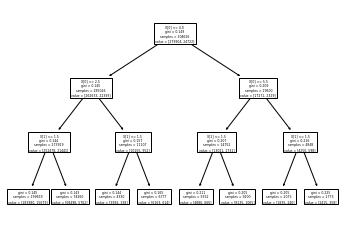

In [87]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
#创建一个名为CAT_NAME_HOUSING_TYPE_OWN_REALTY的新字段，跨越CAT_X_NAME_HOUSING_TYPE、CAT_X_FLAG_OWN_REALTY。
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(pd.DataFrame(application_data_imputation[["CAT_X_NAME_HOUSING_TYPE","CAT_X_FLAG_OWN_REALTY"]]), pd.DataFrame(application_data_imputation['TARGET']))
plot_tree(clf)
plt.show()
application_data_imputation['CAT_NAME_HOUSING_TYPE_OWN_REALTY']=clf.apply(pd.DataFrame(application_data_imputation[["CAT_X_NAME_HOUSING_TYPE","CAT_X_FLAG_OWN_REALTY"]]))

In [88]:
aggregations = {'TARGET': [sum,'count',"mean"]}
application_data_imputation.groupby(["CAT_NAME_HOUSING_TYPE_OWN_REALTY","FLAG_OWN_REALTY","NAME_HOUSING_TYPE"]).agg(aggregations).reset_index()

CAT_NAME_HOUSING_TYPE_OWN_REALTY FLAG_OWN_REALTY    NAME_HOUSING_TYPE  \
                                                                           
0                                 3               Y      Co-op apartment   
1                                 3               Y    House / apartment   
2                                 3               Y     Office apartment   
3                                 4               N      Co-op apartment   
4                                 4               N    House / apartment   
5                                 4               N     Office apartment   
6                                 6               Y  Municipal apartment   
7                                 7               N  Municipal apartment   
8                                10               Y         With parents   
9                                11               N         With parents   
10                               13               Y     Rented apartment   
11                               14               N     Rented apartment   

   TARGET                    
      sum   count      mean  
0      54     696  0.077586  
1   15529  197587  0.078593  
2      96    1376  0.069767  
3      35     422  0.082938  
4    5652   72631  0.077818  
5      75    1207  0.062138  
6     338    4330  0.078060  
7     614    6777  0.090601  
8     666    5552  0.119957  
9    1065    9200  0.115761  
10    240    2075  0.115663  
11    358    2773  0.129102

In [89]:
aggregations = {'TARGET': [sum,'count',"mean"]}
application_data_imputation.groupby(["CAT_REGION_RATING_CLIENT_W_CITY"]).agg(aggregations).reset_index()

CAT_REGION_RATING_CLIENT_W_CITY TARGET                  
                                     sum   count      mean
0                               2   1631   33119  0.049247
1                               3  18105  227873  0.079452
2                               4   4986   43634  0.114269

相关性分析

In [90]:
contact_col = ['REGION_POPULATION_RELATIVE','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','X_FLAG_OWN_REALTY',
               'X_NAME_HOUSING_TYPE','CAT_REGION_POPULATION_RELATIVE','CAT_REGION_RATING_CLIENT','CAT_REGION_RATING_CLIENT_W_CITY',
               'CAT_X_FLAG_OWN_REALTY','CAT_X_NAME_HOUSING_TYPE','CAT_NAME_HOUSING_TYPE_OWN_REALTY','TARGET']
application_data_imputation_contact = application_data_imputation.loc[:,contact_col] 
application_data_imputation_contact = application_data_imputation_contact.astype(float)
application_data_imputation_contact_corr = application_data_imputation_contact.corr()
application_data_imputation_contact_corr

,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,X_FLAG_OWN_REALTY,X_NAME_HOUSING_TYPE,CAT_REGION_POPULATION_RELATIVE,CAT_REGION_RATING_CLIENT,CAT_REGION_RATING_CLIENT_W_CITY,CAT_X_FLAG_OWN_REALTY,CAT_X_NAME_HOUSING_TYPE,CAT_NAME_HOUSING_TYPE_OWN_REALTY,TARGET
REGION_POPULATION_RELATIVE,1.000000,-0.528120,-0.526910,-0.017705,-0.004968,0.876486,-0.528120,-0.526910,-0.017705,-0.016549,-0.017049,-0.036183
REGION_RATING_CLIENT,-0.528120,1.000000,0.950748,0.000663,-0.001756,-0.621409,1.000000,0.950748,0.000663,0.017083,0.011642,0.058139
REGION_RATING_CLIENT_W_CITY,-0.526910,0.950748,1.000000,-0.000050,-0.005419,-0.603515,0.950748,1.000000,-0.000050,0.014151,0.008407,0.060055
X_FLAG_OWN_REALTY,-0.017705,0.000663,-0.000050,1.000000,0.208468,-0.002650,0.000663,-0.000050,1.000000,0.197675,0.404991,0.006545
X_NAME_HOUSING_TYPE,-0.004968,-0.001756,-0.005419,0.208468,1.000000,0.006416,-0.001756,-0.005419,0.208468,0.969488,0.959347,0.035001
CAT_REGION_POPULATION_RELATIVE,0.876486,-0.621409,-0.603515,-0.002650,0.006416,1.000000,-0.621409,-0.603515,-0.002650,-0.008479,-0.005473,-0.043093
CAT_REGION_RATING_CLIENT,-0.528120,1.000000,0.950748,0.000663,-0.001756,-0.621409,1.000000,0.950748,0.000663,0.017083,0.011642,0.058139
CAT_REGION_RATING_CLIENT_W_CITY,-0.526910,0.950748,1.000000,-0.000050,-0.005419,-0.603515,0.950748,1.000000,-0.000050,0.014151,0.008407,0.060055
CAT_X_FLAG_OWN_REALTY,-0.017705,0.000663,-0.000050,1.000000,0.208468,-0.002650,0.000663,-0.000050,1.000000,0.197675,0.404991,0.006545
CAT_X_NAME_HOUSING_TYPE,-0.016549,0.017083,0.014151,0.197675,0.969488,-0.008479,0.017083,0.014151,0.197675,1.000000,0.974320,0.036368


In [91]:
application_data_imputation_contact_corr = application_data_imputation_contact_corr.where(np.triu(np.ones(application_data_imputation_contact_corr.shape),k=1).astype(np.bool))
application_data_imputation_contact_corr = application_data_imputation_contact_corr.unstack().reset_index()
application_data_imputation_contact_corr.columns =['VAR1','VAR2','Correlation']
application_data_imputation_contact_corr.dropna(subset = ["Correlation"], inplace = True)
application_data_imputation_contact_corr["Correlation"]=application_data_imputation_contact_corr["Correlation"].abs() 
application_data_imputation_contact_corr.sort_values(by='Correlation', ascending=False, inplace=True) 
application_data_imputation_contact_corr.head(50)

,VAR1,VAR2,Correlation
73,CAT_REGION_RATING_CLIENT,REGION_RATING_CLIENT,1.000000
86,CAT_REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT_W_CITY,1.000000
99,CAT_X_FLAG_OWN_REALTY,X_FLAG_OWN_REALTY,1.000000
129,CAT_NAME_HOUSING_TYPE_OWN_REALTY,CAT_X_NAME_HOUSING_TYPE,0.974320
112,CAT_X_NAME_HOUSING_TYPE,X_NAME_HOUSING_TYPE,0.969488
124,CAT_NAME_HOUSING_TYPE_OWN_REALTY,X_NAME_HOUSING_TYPE,0.959347
74,CAT_REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,0.950748
90,CAT_REGION_RATING_CLIENT_W_CITY,CAT_REGION_RATING_CLIENT,0.950748
25,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.950748
85,CAT_REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.950748


Target与CAT_REGION_RATING_CLIENT_W_CITY高度相关，之后是CAT_REGION_RATING_CLIENT、CAT_REGION_POPULATION_RELATIVE（负相关）

CAT_REGION_RATING_CLIENT_W_CITY与CAT_REGION_RATING_CLIENT、CAT_REGION_POPULATION_RELATIVE高度相关，CAT_REGION_RATING_CLIENT、CAT_REGION_POPULATION_RELATIVE互相关联

因此保留CAT_REGION_RATING_CLIENT_W_CITY即可

TARGET与CAT_X_NAME_HOUSING_TYPE高度相关，而CAT_X_NAME_HOUSING_TYPE和CAT_REGION_RATING_CLIENT_W_CITY 的相关性较低

保留CAT_X_NAME_HOUSING_TYPE

最终保留CAT_REGION_RATING_CLIENT_W_CITY、CAT_X_NAME_HOUSING_TYPE

收入、工作相关：

AMT_INCOME_TOTAL：收入；

NAME_INCOME_TYPE：收入类型（从事的工作） 

NAME_EDUCATION_TYPE：最高学历；

X_NAME_INCOME_TYPE；

X_NAME_EDUCATION_TYPE；

X_ORGANIZATION_TYPE；

CAT_AMT_INCOME_TOTAL；

CAT_X_NAME_INCOME_TYPE；

CAT_X_NAME_EDUCATION_TYPE；

CAT_X_ORGANIZATION_TYPE； 

CAT_DAYS_EMPLOYED；

DAYS_EMPLOYED

In [92]:
#CAT_AMT_INCOME_TOTAL的逻辑分组，更大的没有意义
aggregations = {'TARGET': [sum,'count',"mean"], 'AMT_INCOME_TOTAL': [min,"mean",max]}
application_data_imputation.groupby(["CAT_AMT_INCOME_TOTAL"]).agg(aggregations).reset_index()

CAT_AMT_INCOME_TOTAL TARGET                   AMT_INCOME_TOTAL  \
                          sum   count      mean              min   
0                    2  18294  215868  0.084746          25650.0   
1                    3   3463   44137  0.078460         184522.5   
2                    5   1723   24256  0.071034         232785.0   
3                    6   1242   20365  0.060987         311400.0   

                            
            mean       max  
0  123025.391173  184500.0  
1  213197.122223  232650.0  
2  266568.065939  310500.0  
3  387480.462258  787500.0

In [93]:
#CAT_X_NAME_INCOME_TYPE的逻辑分组，更大的无意义
aggregations = {'TARGET': [sum,'count',"mean"], 'AMT_INCOME_TOTAL': ["mean"]}
application_data_imputation.groupby(["CAT_X_NAME_INCOME_TYPE","NAME_INCOME_TYPE"]).agg(aggregations).reset_index()

CAT_X_NAME_INCOME_TYPE      NAME_INCOME_TYPE TARGET                    \
                                                  sum   count      mean   
0                      2           Businessman      0       6  0.000000   
1                      2             Pensioner   2976   55053  0.054057   
2                      2         State servant   1242   21389  0.058067   
3                      2               Student      0      18  0.000000   
4                      3  Commercial associate   5307   70256  0.075538   
5                      5               Working  15187  157877  0.096195   
6                      6       Maternity leave      2       5  0.400000   
7                      6            Unemployed      8      22  0.363636   

  AMT_INCOME_TOTAL  
              mean  
0    375000.000000  
1    135124.450853  
2    176302.085382  
3    170500.000000  
4    195941.381092  
5    160502.156612  
6    140400.000000  
7    110536.363636

DecisionTreeClassifier(max_depth=4)

[Text(167.4, 195.696, 'X[0] <= 4.0\ngini = 0.149\nsamples = 304626\nvalue = [279904, 24722]'),
 Text(83.7, 152.208, 'X[0] <= 2.5\ngini = 0.121\nsamples = 146722\nvalue = [137197, 9525]'),
 Text(41.85, 108.72, 'X[1] <= 258975.0\ngini = 0.104\nsamples = 76466\nvalue = [72248, 4218]'),
 Text(20.925, 65.232, 'X[1] <= 258300.0\ngini = 0.106\nsamples = 69905\nvalue = [65968, 3937]'),
 Text(10.4625, 21.744, 'gini = 0.106\nsamples = 69903\nvalue = [65967, 3936]'),
 Text(31.387500000000003, 21.744, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(62.775000000000006, 65.232, 'X[1] <= 326250.0\ngini = 0.082\nsamples = 6561\nvalue = [6280, 281]'),
 Text(52.3125, 21.744, 'gini = 0.078\nsamples = 4136\nvalue = [3968, 168]'),
 Text(73.2375, 21.744, 'gini = 0.089\nsamples = 2425\nvalue = [2312, 113]'),
 Text(125.55000000000001, 108.72, 'X[1] <= 218346.75\ngini = 0.14\nsamples = 70256\nvalue = [64949, 5307]'),
 Text(104.625, 65.232, 'X[1] <= 81186.75\ngini = 0.15\nsamples = 46990\nvalue = [43149, 3841

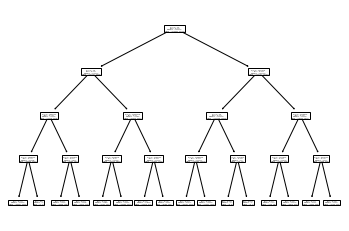

In [94]:
#衍生一个跨越"CAT_X_NAME_INCOME_TYPE","AMT_INCOME_TOTAL"的新变量：'CAT_NAME_INCOME_TYPE_INCOME'
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf = DecisionTreeClassifier(max_depth=4)
clf.fit(pd.DataFrame(application_data_imputation[["CAT_X_NAME_INCOME_TYPE","AMT_INCOME_TOTAL"]]), pd.DataFrame(application_data_imputation['TARGET']))
plot_tree(clf)
plt.show()
application_data_imputation['CAT_NAME_INCOME_TYPE_INCOME']=clf.apply(pd.DataFrame(application_data_imputation[["CAT_X_NAME_INCOME_TYPE","AMT_INCOME_TOTAL"]]))

In [95]:
aggregations = {'TARGET': [sum,'count',"mean"],'AMT_INCOME_TOTAL': [min,"mean",max]}
application_data_imputation.groupby(["CAT_NAME_INCOME_TYPE_INCOME"]).agg(aggregations).reset_index()

CAT_NAME_INCOME_TYPE_INCOME TARGET                  AMT_INCOME_TOTAL  \
                                  sum  count      mean              min   
0                            4   3936  69903  0.056307          26100.0   
1                            5      1      2  0.500000         258750.0   
2                            7    168   4136  0.040619         259200.0   
3                            8    113   2425  0.046598         328500.0   
4                           11    294   3058  0.096141          26550.0   
5                           12   3547  43932  0.080738          81193.5   
6                           14    974  14589  0.066763         218443.5   
7                           15    492   8677  0.056702         314100.0   
8                           19   6020  59171  0.101739          25650.0   
9                           20   7596  78930  0.096237         126900.0   
10                          22      9     17  0.529412          26550.0   
11                          23      1      6  0.166667         112500.0   
12                          26     48    773  0.062096         232875.0   
13                          27    920  10736  0.085693         247500.0   
14                          29    368   5301  0.069421         311400.0   
15                          30    235   2970  0.079125         369000.0   

                             
             mean       max  
0   129183.997151  257850.0  
1   258750.000000  258750.0  
2   286958.941429  324000.0  
3   411349.304097  774000.0  
4    69588.573905   81180.0  
5   147835.363951  218250.0  
6   247912.416490  313650.0  
7   396653.031889  787500.0  
8    95189.538823  126832.5  
9   171141.438839  232650.0  
10   59929.411765   99000.0  
11  146250.000000  225000.0  
12  237803.821475  246600.0  
13  268022.748789  310500.0  
14  333847.559092  366750.0  
15  460990.577273  787500.0

In [96]:
aggregations = {'TARGET': [sum,'count',"mean"], 'AMT_INCOME_TOTAL': ["mean"]}
application_data_imputation.groupby(["CAT_X_NAME_INCOME_TYPE","CAT_DAYS_EMPLOYED"]).agg(aggregations).reset_index()

CAT_X_NAME_INCOME_TYPE CAT_DAYS_EMPLOYED TARGET                    \
                                               sum   count      mean   
0                       2                 2    274    7121  0.038478   
1                       2                 3    232    4139  0.056052   
2                       2                 5    736   10163  0.072420   
3                       2                 6   2976   55043  0.054067   
4                       3                 2    447   10037  0.044535   
5                       3                 3    686   11945  0.057430   
6                       3                 5   4174   48274  0.086465   
7                       5                 2   1536   27499  0.055857   
8                       5                 3   2007   26747  0.075036   
9                       5                 5  11644  103631  0.112360   
10                      6                 3      2       3  0.666667   
11                      6                 5      0       2  0.000000   
12                      6                 6      8      22  0.363636   

   AMT_INCOME_TOTAL  
               mean  
0     184539.906178  
1     181067.928889  
2     168631.774541  
3     135128.847316  
4     202810.697180  
5     203180.114200  
6     192721.967068  
7     165079.698481  
8     166269.337221  
9     157798.982817  
10    159000.000000  
11    112500.000000  
12    110536.363636

In [97]:
aggregations = {'TARGET': [sum,'count',"mean"], 'AMT_INCOME_TOTAL': ["mean"]}
application_data_imputation.groupby(["CAT_X_ORGANIZATION_TYPE"]).agg(aggregations).reset_index()

CAT_X_ORGANIZATION_TYPE TARGET                   AMT_INCOME_TOTAL
                             sum   count      mean             mean
0                       2   4165   76771  0.054252    147536.238111
1                       3   4139   57991  0.071373    163601.543290
2                       5   9768  107019  0.091274    177930.492607
3                       6   6650   62845  0.105816    166571.344184

In [98]:
aggregations = {'TARGET': [sum,'count',"mean"], 'DAYS_EMPLOYED': ["mean"]}
application_data_imputation.groupby(["CAT_DAYS_EMPLOYED"]).agg(aggregations).reset_index()

CAT_DAYS_EMPLOYED TARGET                    DAYS_EMPLOYED
                       sum   count      mean           mean
0                 2   2257   44657  0.050541   -6428.721522
1                 3   2927   42834  0.068334   -3096.223234
2                 5  16554  162070  0.102141   -1074.012322
3                 6   2984   55065  0.054191  365243.000000

DecisionTreeClassifier(max_depth=4)

[Text(167.4, 195.696, 'X[0] <= 4.0\ngini = 0.149\nsamples = 304626\nvalue = [279904, 24722]'),
 Text(83.7, 152.208, 'X[0] <= 2.5\ngini = 0.121\nsamples = 146722\nvalue = [137197, 9525]'),
 Text(41.85, 108.72, 'X[1] <= -5552.5\ngini = 0.104\nsamples = 76466\nvalue = [72248, 4218]'),
 Text(20.925, 65.232, 'X[1] <= -11819.5\ngini = 0.063\nsamples = 4266\nvalue = [4127, 139]'),
 Text(10.4625, 21.744, 'gini = 0.022\nsamples = 359\nvalue = [355, 4]'),
 Text(31.387500000000003, 21.744, 'gini = 0.067\nsamples = 3907\nvalue = [3772, 135]'),
 Text(62.775000000000006, 65.232, 'X[1] <= -232.5\ngini = 0.107\nsamples = 72200\nvalue = [68121, 4079]'),
 Text(52.3125, 21.744, 'gini = 0.121\nsamples = 16410\nvalue = [15347, 1063]'),
 Text(73.2375, 21.744, 'gini = 0.102\nsamples = 55790\nvalue = [52774, 3016]'),
 Text(125.55000000000001, 108.72, 'X[1] <= -2065.5\ngini = 0.14\nsamples = 70256\nvalue = [64949, 5307]'),
 Text(104.625, 65.232, 'X[1] <= -3208.5\ngini = 0.103\nsamples = 26466\nvalue = [25030, 

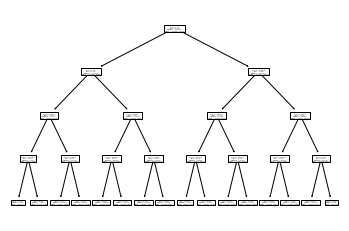

In [99]:
#衍生一个跨越"CAT_X_NAME_INCOME_TYPE","DAYS_EMPLOYED"的新变量：'CAT_NAME_INCOME_TYPE_DAYS_EMPLOYED'
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf = DecisionTreeClassifier(max_depth=4)
clf.fit(pd.DataFrame(application_data_imputation[["CAT_X_NAME_INCOME_TYPE","DAYS_EMPLOYED"]]), pd.DataFrame(application_data_imputation['TARGET']))
plot_tree(clf)
plt.show()
application_data_imputation['CAT_NAME_INCOME_TYPE_DAYS_EMPLOYED']=clf.apply(pd.DataFrame(application_data_imputation[["CAT_X_NAME_INCOME_TYPE","DAYS_EMPLOYED"]]))

In [100]:
aggregations = {'TARGET': [sum,'count',"mean"], 'DAYS_EMPLOYED': ["mean"]}
application_data_imputation.groupby(["CAT_NAME_INCOME_TYPE_DAYS_EMPLOYED"]).agg(aggregations).reset_index()

CAT_NAME_INCOME_TYPE_DAYS_EMPLOYED TARGET                   DAYS_EMPLOYED
                                         sum  count      mean           mean
0                                   4      4    359  0.011142  -13182.309192
1                                   5    135   3907  0.034553   -7749.888917
2                                   7   1063  16410  0.064778   -2342.769531
3                                   8   3016  55790  0.054060  360350.445976
4                                  11    679  14574  0.046590   -5335.534651
5                                  12    757  11892  0.063656   -2602.847545
6                                  14   1620  20345  0.079626   -1443.668272
7                                  15   2251  23445  0.096012    -474.939902
8                                  19    160   4069  0.039322  -11097.093143
9                                  20   1378  23482  0.058683   -5624.210502
10                                 22   2048  27210  0.075266   -3079.831386
11                                 23   1564  17689  0.088417   -2093.843801
12                                 26   1499  14642  0.102377   -1592.190206
13                                 27   2188  19574  0.111781   -1185.189997
14                                 29   6347  51203  0.123958    -515.744781
15                                 30     13     35  0.371429  229579.571429

In [101]:
aggregations = {'TARGET': [sum,'count',"mean"]}
application_data_imputation.groupby(["CAT_X_ORGANIZATION_TYPE"]).agg(aggregations).reset_index()

CAT_X_ORGANIZATION_TYPE TARGET                  
                             sum   count      mean
0                       2   4165   76771  0.054252
1                       3   4139   57991  0.071373
2                       5   9768  107019  0.091274
3                       6   6650   62845  0.105816

相关性分析

In [102]:
contact_col = ['AMT_INCOME_TOTAL','X_NAME_INCOME_TYPE','X_NAME_EDUCATION_TYPE','X_ORGANIZATION_TYPE',
               'CAT_AMT_INCOME_TOTAL','CAT_X_NAME_INCOME_TYPE','CAT_X_NAME_EDUCATION_TYPE','CAT_X_ORGANIZATION_TYPE',
               'CAT_NAME_INCOME_TYPE_INCOME','CAT_DAYS_EMPLOYED','DAYS_EMPLOYED','CAT_NAME_INCOME_TYPE_DAYS_EMPLOYED','TARGET']
application_data_imputation_contact = application_data_imputation.loc[:,contact_col] 
application_data_imputation_contact = application_data_imputation_contact.astype(float)
application_data_imputation_contact_corr = application_data_imputation_contact.corr()
application_data_imputation_contact_corr

,AMT_INCOME_TOTAL,X_NAME_INCOME_TYPE,X_NAME_EDUCATION_TYPE,X_ORGANIZATION_TYPE,CAT_AMT_INCOME_TOTAL,CAT_X_NAME_INCOME_TYPE,CAT_X_NAME_EDUCATION_TYPE,CAT_X_ORGANIZATION_TYPE,CAT_NAME_INCOME_TYPE_INCOME,CAT_DAYS_EMPLOYED,DAYS_EMPLOYED,CAT_NAME_INCOME_TYPE_DAYS_EMPLOYED,TARGET
AMT_INCOME_TOTAL,1.000000,0.078628,-0.241012,0.120622,0.868934,-0.002078,-0.235084,0.108940,0.254598,-0.124542,-0.166816,-0.022078,-0.020857
X_NAME_INCOME_TYPE,0.078628,1.000000,-0.029787,0.663636,0.037726,0.938517,-0.020302,0.634660,0.929162,-0.436418,-0.856607,0.876821,0.061825
X_NAME_EDUCATION_TYPE,-0.241012,-0.029787,1.000000,0.012607,-0.208046,0.034967,0.978655,0.027362,-0.034280,0.058530,0.122121,0.034111,0.055899
X_ORGANIZATION_TYPE,0.120622,0.663636,0.012607,1.000000,0.074223,0.533062,0.021575,0.968811,0.580526,-0.243167,-0.665737,0.528867,0.071353
CAT_AMT_INCOME_TOTAL,0.868934,0.037726,-0.208046,0.074223,1.000000,-0.026180,-0.203745,0.065214,0.254821,-0.095148,-0.112629,-0.042740,-0.024464
CAT_X_NAME_INCOME_TYPE,-0.002078,0.938517,0.034967,0.533062,-0.026180,1.000000,0.040266,0.512928,0.937380,-0.317207,-0.640745,0.942900,0.062191
CAT_X_NAME_EDUCATION_TYPE,-0.235084,-0.020302,0.978655,0.021575,-0.203745,0.040266,1.000000,0.035294,-0.026676,0.061582,0.109402,0.042533,0.056471
CAT_X_ORGANIZATION_TYPE,0.108940,0.634660,0.027362,0.968811,0.065214,0.512928,0.035294,1.000000,0.557125,-0.226744,-0.629038,0.508882,0.069343
CAT_NAME_INCOME_TYPE_INCOME,0.254598,0.929162,-0.034280,0.580526,0.254821,0.937380,-0.026676,0.557125,1.000000,-0.346749,-0.689599,0.878145,0.052931
CAT_DAYS_EMPLOYED,-0.124542,-0.436418,0.058530,-0.243167,-0.095148,-0.317207,0.061582,-0.226744,-0.346749,1.000000,0.554179,-0.063980,0.033562


In [103]:
application_data_imputation_contact_corr = application_data_imputation_contact_corr.where(np.triu(np.ones(application_data_imputation_contact_corr.shape),k=1).astype(np.bool))
application_data_imputation_contact_corr = application_data_imputation_contact_corr.unstack().reset_index()
application_data_imputation_contact_corr.columns =['VAR1','VAR2','Correlation']
application_data_imputation_contact_corr.dropna(subset = ["Correlation"], inplace = True)
application_data_imputation_contact_corr["Correlation"]=application_data_imputation_contact_corr["Correlation"].abs() 
application_data_imputation_contact_corr.sort_values(by='Correlation', ascending=False, inplace=True)
application_data_imputation_contact_corr.loc[application_data_imputation_contact_corr.VAR1=="TARGET"]

,VAR1,VAR2,Correlation
167,TARGET,CAT_NAME_INCOME_TYPE_DAYS_EMPLOYED,0.083073
159,TARGET,X_ORGANIZATION_TYPE,0.071353
163,TARGET,CAT_X_ORGANIZATION_TYPE,0.069343
161,TARGET,CAT_X_NAME_INCOME_TYPE,0.062191
157,TARGET,X_NAME_INCOME_TYPE,0.061825
162,TARGET,CAT_X_NAME_EDUCATION_TYPE,0.056471
158,TARGET,X_NAME_EDUCATION_TYPE,0.055899
164,TARGET,CAT_NAME_INCOME_TYPE_INCOME,0.052931
166,TARGET,DAYS_EMPLOYED,0.045335
165,TARGET,CAT_DAYS_EMPLOYED,0.033562


In [104]:
contact_col = ['X_ORGANIZATION_TYPE','CAT_X_NAME_INCOME_TYPE','CAT_X_NAME_EDUCATION_TYPE',
               'CAT_AMT_INCOME_TOTAL','CAT_DAYS_EMPLOYED','CAT_NAME_INCOME_TYPE_DAYS_EMPLOYED']
application_data_imputation_contact = application_data_imputation.loc[:,contact_col] 
application_data_imputation_contact_corr = application_data_imputation_contact.corr()
application_data_imputation_contact_corr = application_data_imputation_contact_corr.where(np.triu(np.ones(application_data_imputation_contact_corr.shape),k=1).astype(np.bool))
application_data_imputation_contact_corr = application_data_imputation_contact_corr.unstack().reset_index()
application_data_imputation_contact_corr.columns =['VAR1','VAR2','Correlation']
application_data_imputation_contact_corr.dropna(subset = ["Correlation"], inplace = True)
application_data_imputation_contact_corr["Correlation"]=application_data_imputation_contact_corr["Correlation"].abs() 
application_data_imputation_contact_corr.sort_values(by='Correlation', ascending=False, inplace=True)
application_data_imputation_contact_corr

,VAR1,VAR2,Correlation
2,CAT_NAME_INCOME_TYPE_DAYS_EMPLOYED,X_ORGANIZATION_TYPE,0.528867


Target与CAT_NAME_INCOME_TYPE_DAYS_EMPLOYED、X_ORGANIZATION_TYPE、CAT_X_NAME_INCOME_TYPE、CAT_X_NAME_EDUCATION_TYPE、 CAT_AMT_INCOME_TOTAL之间具有高相关性

根据这些变量之间的相关性，保留CAT_NAME_INCOME_TYPE_DAYS_EMPLOYED和CAT_X_NAME_EDUCATION_TYPE

联系方式相关：

DAYS_LAST_PHONE_CHANGE：申请前换过多少电话； CAT_DAYS_LAST_PHONE_CHANGE

In [105]:
aggregations = {'TARGET': [sum,'count',"mean"],'DAYS_LAST_PHONE_CHANGE': [min,max],}
application_data_imputation.groupby(["CAT_" + 'DAYS_LAST_PHONE_CHANGE']).agg(aggregations).reset_index()

CAT_DAYS_LAST_PHONE_CHANGE TARGET                   DAYS_LAST_PHONE_CHANGE  \
                                sum   count      mean                    min   
0                          2   1967   36061  0.054546                -4292.0   
1                          3   5234   79691  0.065679                -2040.0   
2                          5   3136   38031  0.082459                -1122.0   
3                          6  14385  150843  0.095364                 -746.0   

           
      max  
0 -2041.0  
1 -1123.0  
2  -747.0  
3     0.0

最近修改电话号码越多，违约越多

相关性分析

In [106]:
contact_col = ['DAYS_LAST_PHONE_CHANGE','CAT_DAYS_LAST_PHONE_CHANGE','TARGET']
application_data_imputation_contact = application_data_imputation.loc[:,contact_col] 
application_data_imputation_contact = application_data_imputation_contact.astype(float)
application_data_imputation_contact_corr = application_data_imputation_contact.corr()
application_data_imputation_contact_corr

,DAYS_LAST_PHONE_CHANGE,CAT_DAYS_LAST_PHONE_CHANGE,TARGET
DAYS_LAST_PHONE_CHANGE,1.000000,0.935330,0.055803
CAT_DAYS_LAST_PHONE_CHANGE,0.935330,1.000000,0.057395
TARGET,0.055803,0.057395,1.000000


In [107]:
application_data_imputation_contact_corr = application_data_imputation_contact_corr.where(np.triu(np.ones(application_data_imputation_contact_corr.shape),k=1).astype(np.bool))
application_data_imputation_contact_corr = application_data_imputation_contact_corr.unstack().reset_index()
application_data_imputation_contact_corr.columns =['VAR1','VAR2','Correlation']
application_data_imputation_contact_corr.dropna(subset = ["Correlation"], inplace = True)
application_data_imputation_contact_corr["Correlation"]=application_data_imputation_contact_corr["Correlation"].abs() 
application_data_imputation_contact_corr.sort_values(by='Correlation', ascending=False, inplace=True) 
application_data_imputation_contact_corr.loc[application_data_imputation_contact_corr.VAR1=="TARGET"]

,VAR1,VAR2,Correlation
7,TARGET,CAT_DAYS_LAST_PHONE_CHANGE,0.057395
6,TARGET,DAYS_LAST_PHONE_CHANGE,0.055803


In [108]:
application_data_imputation_contact_corr

,VAR1,VAR2,Correlation
3,CAT_DAYS_LAST_PHONE_CHANGE,DAYS_LAST_PHONE_CHANGE,0.935330
7,TARGET,CAT_DAYS_LAST_PHONE_CHANGE,0.057395
6,TARGET,DAYS_LAST_PHONE_CHANGE,0.055803


Target与CAT_DAYS_LAST_PHONE_CHANGE、DAYS_LAST_PHONE_CHANGE高度相关，但同时CAT_DAYS_LAST_PHONE_CHANGE和DAYS_LAST_PHONE_CHANGE之间具有高度相关性，因此保留CAT_DAYS_LAST_PHONE_CHANGE即可

贷款相关：

WEEKDAY_APPR_PROCESS_START:一周中哪一天申请贷款；

HOUR_APPR_PROCESS_START：什么时候申请贷款；

REG_REGION_NOT_LIVE_REGION：永久地址与联系地址不匹配则标记（区域级别）；

REG_REGION_NOT_WORK_REGION：永久地址与工作地址不匹配则标记（区域级别）；

LIVE_REGION_NOT_WORK_REGION：联系地址与工作地址不匹配则标记（区域级别）；

REG_CITY_NOT_LIVE_CITY：永久地址与联系地址不匹配则标记（城市级别）；

REG_CITY_NOT_WORK_CITY：永久地址与工作地址不匹配则标记（城市级别）；

LIVE_CITY_NOT_WORK_CITY：联系地址与工作地址不匹配则标记（城市级别）；

OBS_30_CNT_SOCIAL_CIRCLE:多少次观察客户的社交环境，可观察到 30 DPD（逾期天数）默认值；

DEF_30_CNT_SOCIAL_CIRCLE：在 30 DPD（逾期天数）上违约的客户社交环境观察次数有多少；

OBS_60_CNT_SOCIAL_CIRCLE：对客户的社交环境进行多少次观察，可观察到 60 DPD（逾期天数）默认值；

DEF_60_CNT_SOCIAL_CIRCLE：在 60 DPD（逾期天数）上违约的客户社交环境观察次数有多少；

AMT_REQ_CREDIT_BUREAU_HOUR：申请前一小时向征信局查询客户的次数；

AMT_REQ_CREDIT_BUREAU_DAY：申请前一天向征信局查询客户的次数（申请前一小时除外）；

AMT_REQ_CREDIT_BUREAU_WEEK:申请前1周向征信局查询客户的次数（不含申请前1天）；

AMT_REQ_CREDIT_BUREAU_MON:申请前1个月（不含申请前1周）向征信局查询客户的次数；

AMT_REQ_CREDIT_BUREAU_QRT:申请前3个月向征信局查询客户的次数（申请前1个月除外）；

AMT_REQ_CREDIT_BUREAU_YEAR:一年一天（不包括申请前的最后3个月）向征信局查询客户的次数；

X_WEEKDAY_APPR_PROCESS_START；

CAT_HOUR_APPR_PROCESS_START；

CAT_REG_REGION_NOT_LIVE_REGION；

CAT_REG_REGION_NOT_WORK_REGION；

CAT_LIVE_REGION_NOT_WORK_REGION；

CAT_REG_CITY_NOT_LIVE_CITY；

CAT_REG_CITY_NOT_WORK_CITY；

CAT_LIVE_CITY_NOT_WORK_CITY；

CAT_OBS_30_CNT_SOCIAL_CIRCLE；

CAT_DEF_30_CNT_SOCIAL_CIRCLE；

CAT_OBS_60_CNT_SOCIAL_CIRCLE；

CAT_DEF_60_CNT_SOCIAL_CIRCLE；

CAT_AMT_REQ_CREDIT_BUREAU_HOUR；

CAT_AMT_REQ_CREDIT_BUREAU_DAY；

CAT_AMT_REQ_CREDIT_BUREAU_WEEK；

CAT_AMT_REQ_CREDIT_BUREAU_MON；

CAT_AMT_REQ_CREDIT_BUREAU_QRT；

CAT_AMT_REQ_CREDIT_BUREAU_YEAR；

CAT_X_WEEKDAY_APPR_PROCESS_START

EXT_SOURCE_2

EXT_SOURCE_3

CAT_EXT_SOURCE_2

CAT_EXT_SOURCE_3

相关性分析

In [109]:
contact_col = ['CAT_EXT_SOURCE_2','CAT_EXT_SOURCE_3','CAT_HOUR_APPR_PROCESS_START','CAT_REG_REGION_NOT_LIVE_REGION','CAT_REG_REGION_NOT_WORK_REGION','CAT_LIVE_REGION_NOT_WORK_REGION',
               'CAT_REG_CITY_NOT_LIVE_CITY','CAT_REG_CITY_NOT_WORK_CITY','CAT_LIVE_CITY_NOT_WORK_CITY','CAT_FLAG_DOCUMENT_3',
               'CAT_AMT_REQ_CREDIT_BUREAU_HOUR','CAT_AMT_REQ_CREDIT_BUREAU_DAY','CAT_AMT_REQ_CREDIT_BUREAU_WEEK','CAT_AMT_REQ_CREDIT_BUREAU_MON',
               'CAT_AMT_REQ_CREDIT_BUREAU_QRT','CAT_AMT_REQ_CREDIT_BUREAU_YEAR','CAT_X_WEEKDAY_APPR_PROCESS_START','TARGET']
application_data_imputation_contact = application_data_imputation.loc[:,contact_col] 
application_data_imputation_contact = application_data_imputation_contact.astype(float)
application_data_imputation_contact_corr = application_data_imputation_contact.corr()
application_data_imputation_contact_corr

,CAT_EXT_SOURCE_2,CAT_EXT_SOURCE_3,CAT_HOUR_APPR_PROCESS_START,CAT_REG_REGION_NOT_LIVE_REGION,CAT_REG_REGION_NOT_WORK_REGION,CAT_LIVE_REGION_NOT_WORK_REGION,CAT_REG_CITY_NOT_LIVE_CITY,CAT_REG_CITY_NOT_WORK_CITY,CAT_LIVE_CITY_NOT_WORK_CITY,CAT_FLAG_DOCUMENT_3,CAT_AMT_REQ_CREDIT_BUREAU_HOUR,CAT_AMT_REQ_CREDIT_BUREAU_DAY,CAT_AMT_REQ_CREDIT_BUREAU_WEEK,CAT_AMT_REQ_CREDIT_BUREAU_MON,CAT_AMT_REQ_CREDIT_BUREAU_QRT,CAT_AMT_REQ_CREDIT_BUREAU_YEAR,CAT_X_WEEKDAY_APPR_PROCESS_START,TARGET
CAT_EXT_SOURCE_2,1.000000,0.084447,0.142414,0.013436,0.024519,0.024972,-0.038423,-0.064616,-0.049758,-0.025914,-0.003584,-0.000755,0.003524,0.043566,0.006236,-0.020699,0.000493,-0.152574
CAT_EXT_SOURCE_3,0.084447,1.000000,-0.019232,-0.040759,-0.041606,-0.024839,-0.062848,-0.066210,-0.037203,-0.021401,-0.001321,-0.006157,-0.014048,-0.004681,-0.004653,-0.037971,0.002320,-0.161009
CAT_HOUR_APPR_PROCESS_START,0.142414,-0.019232,1.000000,0.043020,0.067743,0.057222,0.006200,0.024108,0.025228,-0.007888,-0.006788,-0.003037,-0.003195,0.027247,0.001466,-0.026010,0.016849,-0.026534
CAT_REG_REGION_NOT_LIVE_REGION,0.013436,-0.040759,0.043020,1.000000,0.450890,0.088501,0.337753,0.142601,0.010220,-0.032128,-0.001730,-0.001992,-0.000073,-0.000388,-0.005333,-0.011323,0.000058,0.005839
CAT_REG_REGION_NOT_WORK_REGION,0.024519,-0.041606,0.067743,0.450890,1.000000,0.860920,0.150449,0.239089,0.196868,-0.019453,0.001860,-0.003399,-0.002423,0.005319,-0.007461,-0.012792,-0.000240,0.007651
CAT_LIVE_REGION_NOT_WORK_REGION,0.024972,-0.024839,0.057222,0.088501,0.860920,1.000000,0.021000,0.185696,0.236219,-0.009904,0.002781,-0.002872,-0.002682,0.007209,-0.006746,-0.009857,-0.000431,0.003448
CAT_REG_CITY_NOT_LIVE_CITY,-0.038423,-0.062848,0.006200,0.337753,0.150449,0.021000,1.000000,0.440406,0.027657,0.003670,-0.002031,-0.000813,-0.003033,-0.012575,-0.003961,0.001314,-0.004200,0.044497
CAT_REG_CITY_NOT_WORK_CITY,-0.064616,-0.066210,0.024108,0.142601,0.239089,0.185696,0.440406,1.000000,0.825481,0.056818,-0.000679,-0.002953,-0.004894,-0.014408,-0.010780,0.002699,-0.002172,0.051010
CAT_LIVE_CITY_NOT_WORK_CITY,-0.049758,-0.037203,0.025228,0.010220,0.196868,0.236219,0.027657,0.825481,1.000000,0.054269,-0.000322,-0.003460,-0.004443,-0.009063,-0.010411,0.001218,-0.000597,0.032476
CAT_FLAG_DOCUMENT_3,-0.025914,-0.021401,-0.007888,-0.032128,-0.019453,-0.009904,0.003670,0.056818,0.054269,1.000000,-0.001241,0.002031,0.009662,0.017642,0.014208,0.049066,-0.000584,0.044366


In [110]:
application_data_imputation_contact_corr = application_data_imputation_contact_corr.where(np.triu(np.ones(application_data_imputation_contact_corr.shape),k=1).astype(np.bool))
application_data_imputation_contact_corr = application_data_imputation_contact_corr.unstack().reset_index()
application_data_imputation_contact_corr.columns =['VAR1','VAR2','Correlation']
application_data_imputation_contact_corr.dropna(subset = ["Correlation"], inplace = True)
application_data_imputation_contact_corr["Correlation"]=application_data_imputation_contact_corr["Correlation"].abs() 
application_data_imputation_contact_corr.sort_values(by='Correlation', ascending=False, inplace=True) 
application_data_imputation_contact_corr.loc[application_data_imputation_contact_corr.VAR1=="TARGET"]

,VAR1,VAR2,Correlation
307,TARGET,CAT_EXT_SOURCE_3,0.161009
306,TARGET,CAT_EXT_SOURCE_2,0.152574
313,TARGET,CAT_REG_CITY_NOT_WORK_CITY,0.051010
312,TARGET,CAT_REG_CITY_NOT_LIVE_CITY,0.044497
315,TARGET,CAT_FLAG_DOCUMENT_3,0.044366
314,TARGET,CAT_LIVE_CITY_NOT_WORK_CITY,0.032476
308,TARGET,CAT_HOUR_APPR_PROCESS_START,0.026534
321,TARGET,CAT_AMT_REQ_CREDIT_BUREAU_YEAR,0.021850
319,TARGET,CAT_AMT_REQ_CREDIT_BUREAU_MON,0.014518
320,TARGET,CAT_AMT_REQ_CREDIT_BUREAU_QRT,0.011464


In [111]:
contact_col = ['CAT_EXT_SOURCE_2','CAT_EXT_SOURCE_3','CAT_HOUR_APPR_PROCESS_START','CAT_REG_CITY_NOT_LIVE_CITY','CAT_REG_CITY_NOT_WORK_CITY','CAT_LIVE_CITY_NOT_WORK_CITY',
               'CAT_FLAG_DOCUMENT_3','CAT_AMT_REQ_CREDIT_BUREAU_MON','CAT_AMT_REQ_CREDIT_BUREAU_QRT','TARGET']
application_data_imputation_contact = application_data_imputation.loc[:,contact_col] 
application_data_imputation_contact_corr = application_data_imputation_contact.corr()
application_data_imputation_contact_corr

,TARGET
TARGET,1.0


In [112]:
application_data_imputation_contact_corr = application_data_imputation_contact_corr.where(np.triu(np.ones(application_data_imputation_contact_corr.shape),k=1).astype(np.bool))
application_data_imputation_contact_corr = application_data_imputation_contact_corr.unstack().reset_index()
application_data_imputation_contact_corr.columns =['VAR1','VAR2','Correlation']
application_data_imputation_contact_corr.dropna(subset = ["Correlation"], inplace = True)
application_data_imputation_contact_corr["Correlation"]=application_data_imputation_contact_corr["Correlation"].abs() 
application_data_imputation_contact_corr.sort_values(by='Correlation', ascending=False, inplace=True) 
application_data_imputation_contact_corr

,VAR1,VAR2,Correlation


Target和CAT_EXT_SOURCE_2, CAT_EXT_SOURCE_3,CAT_REG_CITY_NOT_WORK_CITY的相关性最高，其次是CAT_REG_CITY_NOT_LIVE_CITY、CAT_FLAG_DOCUMENT_3，之后是CAT_LIVE_CITY_NOT_WORK_CITY。

CAT_REG_CITY_NOT_WORK_CITY和CAT_FLAG_DOCUMENT_3的相关性很低，CAT_REG_CITY_NOT_WORK_CITY和CAT_REG_CITY_NOT_LIVE_CITY、CAT_LIVE_CITY_NOT_WORK_CITY的相关性很高

保留：CAT_REG_CITY_NOT_WORK_CITY、CAT_FLAG_DOCUMENT_3,CAT_EXT_SOURCE_2, CAT_EXT_SOURCE_3

其他变量：

NAME_CONTRACT_TYPE； 

FLAG_OWN_CAR； 

AMT_CREDIT； 

AMT_ANNUITY； 

AMT_GOODS_PRICE； 

DAYS_BIRTH；

DAYS_REGISTRATION； 

DAYS_ID_PUBLISH； 

X_NAME_CONTRACT_TYPE； 

X_FLAG_OWN_CAR； 

CAT_AMT_CREDIT； 

CAT_AMT_ANNUITY； 

CAT_AMT_GOODS_PRICE； 

CAT_DAYS_BIRTH； 

CAT_DAYS_REGISTRATION； 

CAT_DAYS_ID_PUBLISH； 

CAT_X_NAME_CONTRACT_TYPE； 

CAT_X_FLAG_OWN_CAR

In [113]:
aggregations = {'TARGET': [sum,'count',"mean"]}
application_data_imputation.groupby(['CAT_X_NAME_CONTRACT_TYPE']).agg(aggregations).reset_index()

CAT_X_NAME_CONTRACT_TYPE TARGET                  
                              sum   count      mean
0                        1   1600   29084  0.055013
1                        2  23122  275542  0.083915

In [114]:
TestHomog('CAT_X_NAME_CONTRACT_TYPE')
#对Target有影响，保留

z=-17.166398150697805 et p=4.73931703742878e-66
Conclusion : H0 rejection : Proportions are different


In [115]:
aggregations = {'TARGET': [sum,'count',"mean"],'DAYS_BIRTH': [min,"mean",max]}
application_data_imputation.groupby(['CAT_DAYS_BIRTH']).agg(aggregations).reset_index()
#TARGET和客户年龄相关

CAT_DAYS_BIRTH TARGET                   DAYS_BIRTH                     
                    sum   count      mean        min          mean    max
0              2   3820   72520  0.052675     -25201 -21967.984253 -19866
1              3   9068  119823  0.075678     -19865 -16790.527570 -14018
2              5   4934   51497  0.095811     -14017 -12879.287492 -11679
3              6   6900   60786  0.113513     -11678 -10139.290824  -7489

In [116]:
aggregations = {'TARGET': [sum,'count',"mean"]}
application_data_imputation.groupby(['CAT_DAYS_ID_PUBLISH']).agg(aggregations).reset_index()

CAT_DAYS_ID_PUBLISH TARGET                  
                         sum   count      mean
0                   2   5283   85794  0.061578
1                   3   1480   20311  0.072867
2                   5   9602  114528  0.083840
3                   6   8357   83993  0.099496

In [117]:
aggregations = {'TARGET': [sum,'count',"mean"]}
application_data_imputation.groupby(['CAT_DAYS_REGISTRATION']).agg(aggregations).reset_index()

CAT_DAYS_REGISTRATION TARGET                  
                           sum   count      mean
0                     2   2455   42944  0.057167
1                     3   3231   45036  0.071743
2                     5  14746  172412  0.085528
3                     6   4290   44234  0.096984

In [118]:
aggregations = {'TARGET': [sum,'count',"mean"],'AMT_GOODS_PRICE': [min,"mean",max]}
application_data_imputation.groupby(['CAT_AMT_GOODS_PRICE']).agg(aggregations).reset_index()
#在第二个类别中观察违约比例更高：0.129028，价格位于 [342000,450000]，当价格上涨/下降时，违约评级会降低。

CAT_AMT_GOODS_PRICE TARGET                   AMT_GOODS_PRICE                \
                         sum   count      mean             min          mean   
0                   2   9396  115378  0.081437         40500.0  2.116069e+05   
1                   3   5521   42789  0.129028        342000.0  4.249929e+05   
2                   5   5315   68800  0.077253        450234.0  5.742640e+05   
3                   6   4490   77659  0.057817        679500.0  1.008599e+06   

              
         max  
0   338598.0  
1   450000.0  
2   676278.0  
3  1998000.0

DecisionTreeClassifier(max_depth=4)

[Text(167.4, 195.696, 'X[0] <= 450117.0\ngini = 0.149\nsamples = 304626\nvalue = [279904, 24722]'),
 Text(83.7, 152.208, 'X[1] <= 406309.5\ngini = 0.171\nsamples = 158167\nvalue = [143250, 14917]'),
 Text(41.85, 108.72, 'X[1] <= 281884.5\ngini = 0.148\nsamples = 119372\nvalue = [109775, 9597]'),
 Text(20.925, 65.232, 'X[1] <= 158105.25\ngini = 0.135\nsamples = 81631\nvalue = [75696, 5935]'),
 Text(10.4625, 21.744, 'gini = 0.113\nsamples = 21527\nvalue = [20231, 1296]'),
 Text(31.387500000000003, 21.744, 'gini = 0.142\nsamples = 60104\nvalue = [55465, 4639]'),
 Text(62.775000000000006, 65.232, 'X[0] <= 227250.0\ngini = 0.175\nsamples = 37741\nvalue = [34079, 3662]'),
 Text(52.3125, 21.744, 'gini = 0.224\nsamples = 6853\nvalue = [5970, 883]'),
 Text(73.2375, 21.744, 'gini = 0.164\nsamples = 30888\nvalue = [28109, 2779]'),
 Text(125.55000000000001, 108.72, 'X[1] <= 505437.75\ngini = 0.237\nsamples = 38795\nvalue = [33475, 5320]'),
 Text(104.625, 65.232, 'X[0] <= 405112.5\ngini = 0.207\nsa

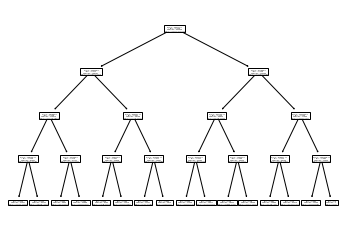

In [119]:
#衍生一个跨越"AMT_GOODS_PRICE",'AMT_CREDIT'的新变量：'CAT_GOODS_CREDIT'
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf = DecisionTreeClassifier(max_depth=4)
clf.fit(pd.DataFrame(application_data_imputation[["AMT_GOODS_PRICE",'AMT_CREDIT']]), pd.DataFrame(application_data_imputation['TARGET']))
plot_tree(clf)
plt.show()
application_data_imputation['CAT_GOODS_CREDIT']=clf.apply(pd.DataFrame(application_data_imputation[["AMT_GOODS_PRICE",'AMT_CREDIT']]))

In [120]:
aggregations = {'TARGET': [sum,'count',"mean"],'AMT_GOODS_PRICE': [min,"mean",max]}
application_data_imputation.groupby(['CAT_GOODS_CREDIT']).agg(aggregations).reset_index()

CAT_GOODS_CREDIT TARGET                  AMT_GOODS_PRICE                \
                       sum  count      mean             min          mean   
0                 4   1296  21527  0.060203         40500.0  1.091628e+05   
1                 5   4639  60104  0.077183         45000.0  2.138293e+05   
2                 7    883   6853  0.128849         67500.0  2.232277e+05   
3                 8   2779  30888  0.089970        229500.0  3.022059e+05   
4                11   1117   8462  0.132002        157500.0  3.588870e+05   
5                12   1558  14376  0.108375        405225.0  4.469388e+05   
6                14   1745  11147  0.156544        202500.0  4.416682e+05   
7                15    900   4810  0.187110        135000.0  4.466049e+05   
8                19    940  17409  0.053995        450234.0  4.757427e+05   
9                20   1082  15071  0.071794        453465.0  5.141357e+05   
10               22   1469  18024  0.081502        454500.0  6.283987e+05   
11               23   1824  18296  0.099694        526500.0  6.642085e+05   
12               26    461  10886  0.042348        679500.0  7.101926e+05   
13               27   3493  54273  0.064360        679500.0  9.604965e+05   
14               29    535  12499  0.042803       1336500.0  1.477289e+06   
15               30      1      1  1.000000       1998000.0  1.998000e+06   

               
          max  
0    450000.0  
1    450000.0  
2    225000.0  
3    450000.0  
4    405000.0  
5    450000.0  
6    450000.0  
7    450000.0  
8    675000.0  
9    630400.5  
10   676278.0  
11   675981.0  
12  1012500.0  
13  1332000.0  
14  1996456.5  
15  1998000.0

DecisionTreeClassifier(max_depth=4)

[Text(167.4, 195.696, 'X[0] <= 672320.25\ngini = 0.149\nsamples = 304626\nvalue = [279904, 24722]'),
 Text(83.7, 152.208, 'X[1] <= 16494.75\ngini = 0.162\nsamples = 194704\nvalue = [177401, 17303]'),
 Text(41.85, 108.72, 'X[0] <= 153540.0\ngini = 0.131\nsamples = 76536\nvalue = [71138, 5398]'),
 Text(20.925, 65.232, 'X[1] <= 12519.0\ngini = 0.111\nsamples = 19362\nvalue = [18219, 1143]'),
 Text(10.4625, 21.744, 'gini = 0.118\nsamples = 15541\nvalue = [14562, 979]'),
 Text(31.387500000000003, 21.744, 'gini = 0.082\nsamples = 3821\nvalue = [3657, 164]'),
 Text(62.775000000000006, 65.232, 'X[0] <= 359862.75\ngini = 0.138\nsamples = 57174\nvalue = [52919, 4255]'),
 Text(52.3125, 21.744, 'gini = 0.142\nsamples = 51192\nvalue = [47257, 3935]'),
 Text(73.2375, 21.744, 'gini = 0.101\nsamples = 5982\nvalue = [5662, 320]'),
 Text(125.55000000000001, 108.72, 'X[1] <= 25404.75\ngini = 0.181\nsamples = 118168\nvalue = [106263, 11905]'),
 Text(104.625, 65.232, 'X[0] <= 493033.5\ngini = 0.167\nsample

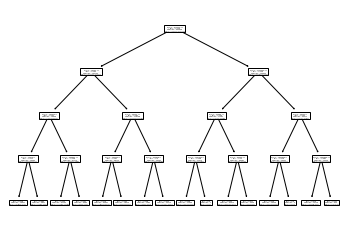

In [121]:
#衍生一个跨越"AMT_CREDIT",'AMT_ANNUITY'的新变量：'CAT_CREDIT_ANNUITY'
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf = DecisionTreeClassifier(max_depth=4)
clf.fit(pd.DataFrame(application_data_imputation[["AMT_CREDIT",'AMT_ANNUITY']]), pd.DataFrame(application_data_imputation['TARGET']))
plot_tree(clf)
plt.show()
application_data_imputation['CAT_CREDIT_ANNUITY']=clf.apply(pd.DataFrame(application_data_imputation[["AMT_CREDIT",'AMT_ANNUITY']]))

In [122]:
aggregations = {'TARGET': [sum,'count',"mean"],'AMT_GOODS_PRICE': [min,"mean",max]}
application_data_imputation.groupby(['CAT_CREDIT_ANNUITY']).agg(aggregations).reset_index()

CAT_CREDIT_ANNUITY TARGET                  AMT_GOODS_PRICE                \
                         sum  count      mean             min          mean   
0                   4    979  15541  0.062995         40500.0  9.907672e+04   
1                   5    164   3821  0.042921         90000.0  1.283424e+05   
2                   7   3935  51192  0.076867         45000.0  2.187279e+05   
3                   8    320   5982  0.053494        225000.0  4.027247e+05   
4                  11   5031  50501  0.099622        112500.0  2.998810e+05   
5                  12   1289  18213  0.070774        342000.0  4.836312e+05   
6                  14    502   7284  0.068918        184500.0  2.515387e+05   
7                  15   5083  42170  0.120536        135000.0  4.615525e+05   
8                  19    649  11369  0.057085        441000.0  6.708069e+05   
9                  20      1      1  1.000000       1107000.0  1.107000e+06   
10                 22   4934  64072  0.077007        135000.0  7.742513e+05   
11                 23     81   2009  0.040319        630000.0  7.874200e+05   
12                 26   1191  19229  0.061938        805500.0  1.176006e+06   
13                 27      2      2  1.000000       1903500.0  1.908000e+06   
14                 29    521  12716  0.040972        450000.0  1.350028e+06   
15                 30     40    524  0.076336       1642500.0  1.812243e+06   

               
          max  
0    900000.0  
1    153000.0  
2    900000.0  
3    661500.0  
4   1012500.0  
5    900000.0  
6    337500.0  
7    900000.0  
8   1008000.0  
9   1107000.0  
10  1350000.0  
11  1111500.0  
12  1728000.0  
13  1912500.0  
14  1948500.0  
15  1998000.0

In [123]:
aggregations = {'TARGET': [sum,'count',"mean"]}
application_data_imputation.groupby(['CAT_X_FLAG_OWN_CAR']).agg(aggregations).reset_index()

CAT_X_FLAG_OWN_CAR TARGET                  
                        sum   count      mean
0                  1   7522  102945  0.073068
1                  2  17200  201681  0.085283

In [124]:
TestHomog('FLAG_OWN_CAR')
#对Target有影响，保留

z=11.677975428253308 et p=1.6518302819247003e-31
Conclusion : H0 rejection : Proportions are different


In [125]:
contact_col = ['AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_REGISTRATION',
               'DAYS_ID_PUBLISH','X_NAME_CONTRACT_TYPE','X_FLAG_OWN_CAR','CAT_AMT_CREDIT',
               'CAT_AMT_ANNUITY','CAT_AMT_GOODS_PRICE','CAT_DAYS_BIRTH','CAT_DAYS_REGISTRATION',
               'CAT_DAYS_ID_PUBLISH','CAT_X_NAME_CONTRACT_TYPE','CAT_X_FLAG_OWN_CAR',
               'CAT_GOODS_CREDIT','CAT_CREDIT_ANNUITY','TARGET']
application_data_imputation_contact = application_data_imputation.loc[:,contact_col] 
application_data_imputation_contact = application_data_imputation_contact.astype(float)
application_data_imputation_contact_corr = application_data_imputation_contact.corr()
application_data_imputation_contact_corr

,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,X_NAME_CONTRACT_TYPE,X_FLAG_OWN_CAR,CAT_AMT_CREDIT,CAT_AMT_ANNUITY,CAT_AMT_GOODS_PRICE,CAT_DAYS_BIRTH,CAT_DAYS_REGISTRATION,CAT_DAYS_ID_PUBLISH,CAT_X_NAME_CONTRACT_TYPE,CAT_X_FLAG_OWN_CAR,CAT_GOODS_CREDIT,CAT_CREDIT_ANNUITY,TARGET
AMT_CREDIT,1.000000,0.768619,0.985405,-0.057073,0.006827,-0.005659,0.230371,-0.109181,0.927311,0.671188,0.867330,-0.089569,0.000600,-0.006073,0.230371,-0.109181,0.908764,0.926336,-0.026562
AMT_ANNUITY,0.768619,1.000000,0.771522,0.013099,0.038802,0.014344,0.258196,-0.137598,0.725448,0.892314,0.699242,-0.013817,0.033621,0.011275,0.258196,-0.137598,0.734779,0.831387,-0.007794
AMT_GOODS_PRICE,0.985405,0.771522,1.000000,-0.055283,0.008738,-0.008400,0.192884,-0.113567,0.918005,0.678144,0.866440,-0.086942,0.002358,-0.008667,0.192884,-0.113567,0.899459,0.918958,-0.036323
DAYS_BIRTH,-0.057073,0.013099,-0.055283,1.000000,0.332383,0.274157,-0.086571,-0.130675,-0.061792,0.004654,-0.079284,0.922576,0.328416,0.276107,-0.086571,-0.130675,-0.069554,-0.030861,0.078489
DAYS_REGISTRATION,0.006827,0.038802,0.008738,0.332383,1.000000,0.102094,-0.020477,-0.087569,0.001271,0.030208,-0.006239,0.303735,0.909360,0.101884,-0.020477,-0.087569,-0.000401,0.016982,0.042348
DAYS_ID_PUBLISH,-0.005659,0.014344,-0.008400,0.274157,0.102094,1.000000,-0.053668,-0.013750,-0.010314,0.008583,-0.016863,0.261230,0.076733,0.874402,-0.053668,-0.013750,-0.012252,0.002666,0.051680
X_NAME_CONTRACT_TYPE,0.230371,0.258196,0.192884,-0.086571,-0.020477,-0.053668,1.000000,0.004165,0.246537,0.223925,0.236418,-0.070585,-0.018372,-0.043572,1.000000,0.004165,0.263539,0.265976,0.031103
X_FLAG_OWN_CAR,-0.109181,-0.137598,-0.113567,-0.130675,-0.087569,-0.013750,0.004165,1.000000,-0.099058,-0.118666,-0.091215,-0.104330,-0.084589,-0.014515,0.004165,1.000000,-0.097294,-0.118681,0.021158
CAT_AMT_CREDIT,0.927311,0.725448,0.918005,-0.061792,0.001271,-0.010314,0.246537,-0.099058,1.000000,0.614575,0.878097,-0.094844,-0.004408,-0.009676,0.246537,-0.099058,0.921680,0.944855,-0.027639
CAT_AMT_ANNUITY,0.671188,0.892314,0.678144,0.004654,0.030208,0.008583,0.223925,-0.118666,0.614575,1.000000,0.596336,-0.017807,0.025471,0.006089,0.223925,-0.118666,0.625688,0.716764,-0.011609


In [126]:
application_data_imputation_contact_corr = application_data_imputation_contact_corr.where(np.triu(np.ones(application_data_imputation_contact_corr.shape),k=1).astype(np.bool))
application_data_imputation_contact_corr = application_data_imputation_contact_corr.unstack().reset_index()
application_data_imputation_contact_corr.columns =['VAR1','VAR2','Correlation']
application_data_imputation_contact_corr.dropna(subset = ["Correlation"], inplace = True)
application_data_imputation_contact_corr["Correlation"]=application_data_imputation_contact_corr["Correlation"].abs() 
application_data_imputation_contact_corr.sort_values(by='Correlation', ascending=False, inplace=True) 
application_data_imputation_contact_corr.head(50)

,VAR1,VAR2,Correlation
272,CAT_X_NAME_CONTRACT_TYPE,X_NAME_CONTRACT_TYPE,1.000000
292,CAT_X_FLAG_OWN_CAR,X_FLAG_OWN_CAR,1.000000
38,AMT_GOODS_PRICE,AMT_CREDIT,0.985405
314,CAT_GOODS_CREDIT,CAT_AMT_GOODS_PRICE,0.983714
331,CAT_CREDIT_ANNUITY,CAT_AMT_CREDIT,0.944855
152,CAT_AMT_CREDIT,AMT_CREDIT,0.927311
323,CAT_CREDIT_ANNUITY,AMT_CREDIT,0.926336
212,CAT_DAYS_BIRTH,DAYS_BIRTH,0.922576
312,CAT_GOODS_CREDIT,CAT_AMT_CREDIT,0.921680
325,CAT_CREDIT_ANNUITY,AMT_GOODS_PRICE,0.918958


In [127]:
application_data_imputation_contact_corr.loc[application_data_imputation_contact_corr.VAR1=="TARGET"]

,VAR1,VAR2,Correlation
345,TARGET,DAYS_BIRTH,0.078489
353,TARGET,CAT_DAYS_BIRTH,0.076416
355,TARGET,CAT_DAYS_ID_PUBLISH,0.051725
347,TARGET,DAYS_ID_PUBLISH,0.051680
354,TARGET,CAT_DAYS_REGISTRATION,0.043064
352,TARGET,CAT_AMT_GOODS_PRICE,0.042589
346,TARGET,DAYS_REGISTRATION,0.042348
344,TARGET,AMT_GOODS_PRICE,0.036323
356,TARGET,CAT_X_NAME_CONTRACT_TYPE,0.031103
348,TARGET,X_NAME_CONTRACT_TYPE,0.031103


In [128]:
contact_col = ['CAT_AMT_CREDIT','CAT_AMT_ANNUITY','CAT_AMT_GOODS_PRICE','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','TARGET']
application_data_imputation_contact = application_data_imputation.loc[:,contact_col] 
application_data_imputation_contact_corr = application_data_imputation_contact.corr()
application_data_imputation_contact_corr

,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,TARGET
AMT_CREDIT,1.000000,0.768619,0.985405,-0.026562
AMT_ANNUITY,0.768619,1.000000,0.771522,-0.007794
AMT_GOODS_PRICE,0.985405,0.771522,1.000000,-0.036323
TARGET,-0.026562,-0.007794,-0.036323,1.000000


In [129]:
application_data_imputation_contact_corr = application_data_imputation_contact_corr.where(np.triu(np.ones(application_data_imputation_contact_corr.shape),k=1).astype(np.bool))
application_data_imputation_contact_corr = application_data_imputation_contact_corr.unstack().reset_index()
application_data_imputation_contact_corr.columns =['VAR1','VAR2','Correlation']
application_data_imputation_contact_corr.dropna(subset = ["Correlation"], inplace = True)
application_data_imputation_contact_corr["Correlation"]=application_data_imputation_contact_corr["Correlation"].abs() 
application_data_imputation_contact_corr.sort_values(by='Correlation', ascending=False, inplace=True) 
application_data_imputation_contact_corr.head(50)

,VAR1,VAR2,Correlation
8,AMT_GOODS_PRICE,AMT_CREDIT,0.985405
9,AMT_GOODS_PRICE,AMT_ANNUITY,0.771522
4,AMT_ANNUITY,AMT_CREDIT,0.768619
14,TARGET,AMT_GOODS_PRICE,0.036323
12,TARGET,AMT_CREDIT,0.026562
13,TARGET,AMT_ANNUITY,0.007794


Target和DAYS_BIRTH、CAT_DAYS_BIRTH、CAT_DAYS_ID_PUBLISH、DAYS_ID_PUBLISH、CAT_DAYS_REGISTRATION、CAT_AMT_GOODS_PRICE、具有较高的相关性。

根据相关性，保留：CAT_DAYS_BIRTH、CAT_DAYS_REGISTRATION、CAT_DAYS_ID_PUBLISH、CAT_AMT_GOODS_PRICE、CAT_X_NAME_CONTRACT_TYPE、CAT_X_FLAG_OWN_CAR

对选择的字段进行相关性判断

In [130]:
contact_col = ['CAT_EXT_SOURCE_2','CAT_EXT_SOURCE_3','CAT_AMT_GOODS_PRICE','CAT_DAYS_BIRTH','CAT_DAYS_REGISTRATION','CAT_DAYS_ID_PUBLISH',
               'CAT_REGION_RATING_CLIENT_W_CITY','CAT_REG_CITY_NOT_WORK_CITY','CAT_DAYS_LAST_PHONE_CHANGE','CAT_FLAG_DOCUMENT_3',
              'CAT_X_NAME_CONTRACT_TYPE','CAT_X_FLAG_OWN_CAR','CAT_X_NAME_EDUCATION_TYPE','CAT_X_NAME_HOUSING_TYPE',
              'CAT_NAME_FAMILY_STATUS_CHILD','CAT_NAME_INCOME_TYPE_DAYS_EMPLOYED','TARGET']
application_data_imputation_contact = application_data_imputation.loc[:,contact_col]
application_data_imputation_contact = application_data_imputation_contact.astype(float)
application_data_imputation_contact_corr = application_data_imputation_contact.corr()
application_data_imputation_contact_corr

,CAT_EXT_SOURCE_2,CAT_EXT_SOURCE_3,CAT_AMT_GOODS_PRICE,CAT_DAYS_BIRTH,CAT_DAYS_REGISTRATION,CAT_DAYS_ID_PUBLISH,CAT_REGION_RATING_CLIENT_W_CITY,CAT_REG_CITY_NOT_WORK_CITY,CAT_DAYS_LAST_PHONE_CHANGE,CAT_FLAG_DOCUMENT_3,CAT_X_NAME_CONTRACT_TYPE,CAT_X_FLAG_OWN_CAR,CAT_X_NAME_EDUCATION_TYPE,CAT_X_NAME_HOUSING_TYPE,CAT_NAME_FAMILY_STATUS_CHILD,CAT_NAME_INCOME_TYPE_DAYS_EMPLOYED,TARGET
CAT_EXT_SOURCE_2,1.000000,0.084447,0.109742,-0.090859,-0.048647,-0.043291,-0.250872,-0.064616,-0.159586,-0.025914,-0.016695,-0.050970,-0.114028,-0.044849,-0.048281,-0.068008,-0.152574
CAT_EXT_SOURCE_3,0.084447,1.000000,0.051740,-0.151652,-0.076373,-0.100989,-0.005023,-0.066210,-0.076089,-0.021401,0.005720,0.010547,0.012841,-0.053053,-0.053045,-0.094651,-0.161009
CAT_AMT_GOODS_PRICE,0.109742,0.051740,1.000000,-0.111486,-0.012134,-0.016601,-0.078757,-0.024338,-0.092915,0.115388,0.236418,-0.091215,-0.092988,-0.062155,-0.111654,-0.063985,-0.042589
CAT_DAYS_BIRTH,-0.090859,-0.151652,-0.111486,1.000000,0.308147,0.290670,0.012804,0.215444,0.109198,0.078269,-0.070585,-0.104330,-0.120710,0.226971,0.297532,0.369531,0.076416
CAT_DAYS_REGISTRATION,-0.048647,-0.076373,-0.012134,0.308147,1.000000,0.080924,0.069204,0.100433,0.053062,0.033105,-0.018372,-0.084589,-0.089567,0.052324,0.094143,0.152082,0.043064
CAT_DAYS_ID_PUBLISH,-0.043291,-0.100989,-0.016601,0.290670,0.080924,1.000000,-0.006321,0.096191,0.089435,0.053700,-0.043572,-0.014515,-0.036251,0.084864,0.064790,0.187053,0.051725
CAT_REGION_RATING_CLIENT_W_CITY,-0.250872,-0.005023,-0.078757,0.012804,0.069204,-0.006321,1.000000,0.027352,0.018552,0.064952,0.023242,0.019173,0.064320,0.014151,-0.008235,0.056588,0.060055
CAT_REG_CITY_NOT_WORK_CITY,-0.064616,-0.066210,-0.024338,0.215444,0.100433,0.096191,0.027352,1.000000,0.050421,0.056818,-0.004851,-0.077384,0.022644,0.116025,0.072787,0.210343,0.051010
CAT_DAYS_LAST_PHONE_CHANGE,-0.159586,-0.076089,-0.092915,0.109198,0.053062,0.089435,0.018552,0.050421,1.000000,-0.064454,-0.071141,0.034982,-0.001684,0.036619,0.056094,0.064205,0.057395
CAT_FLAG_DOCUMENT_3,-0.025914,-0.021401,0.115388,0.078269,0.033105,0.053700,0.064952,0.056818,-0.064454,1.000000,0.481684,0.068222,0.052670,0.004156,0.022676,0.161341,0.044366


In [131]:
application_data_imputation_contact_corr = application_data_imputation_contact_corr.where(np.triu(np.ones(application_data_imputation_contact_corr.shape),k=1).astype(np.bool))
application_data_imputation_contact_corr = application_data_imputation_contact_corr.unstack().reset_index()
application_data_imputation_contact_corr.columns =['VAR1','VAR2','Correlation']
application_data_imputation_contact_corr.dropna(subset = ["Correlation"], inplace = True)
application_data_imputation_contact_corr["Correlation"]=application_data_imputation_contact_corr["Correlation"].abs() 
application_data_imputation_contact_corr.sort_values(by='Correlation', ascending=False, inplace=True) 
application_data_imputation_contact_corr.head(50)

,VAR1,VAR2,Correlation
179,CAT_X_NAME_CONTRACT_TYPE,CAT_FLAG_DOCUMENT_3,0.481684
258,CAT_NAME_INCOME_TYPE_DAYS_EMPLOYED,CAT_DAYS_BIRTH,0.369531
71,CAT_DAYS_REGISTRATION,CAT_DAYS_BIRTH,0.308147
241,CAT_NAME_FAMILY_STATUS_CHILD,CAT_DAYS_BIRTH,0.297532
88,CAT_DAYS_ID_PUBLISH,CAT_DAYS_BIRTH,0.290670
102,CAT_REGION_RATING_CLIENT_W_CITY,CAT_EXT_SOURCE_2,0.250872
172,CAT_X_NAME_CONTRACT_TYPE,CAT_AMT_GOODS_PRICE,0.236418
224,CAT_X_NAME_HOUSING_TYPE,CAT_DAYS_BIRTH,0.226971
122,CAT_REG_CITY_NOT_WORK_CITY,CAT_DAYS_BIRTH,0.215444
262,CAT_NAME_INCOME_TYPE_DAYS_EMPLOYED,CAT_REG_CITY_NOT_WORK_CITY,0.210343


In [132]:
application_data_imputation_contact_corr.loc[application_data_imputation_contact_corr.VAR1=="TARGET"]

,VAR1,VAR2,Correlation
273,TARGET,CAT_EXT_SOURCE_3,0.161009
272,TARGET,CAT_EXT_SOURCE_2,0.152574
287,TARGET,CAT_NAME_INCOME_TYPE_DAYS_EMPLOYED,0.083073
275,TARGET,CAT_DAYS_BIRTH,0.076416
278,TARGET,CAT_REGION_RATING_CLIENT_W_CITY,0.060055
280,TARGET,CAT_DAYS_LAST_PHONE_CHANGE,0.057395
284,TARGET,CAT_X_NAME_EDUCATION_TYPE,0.056471
277,TARGET,CAT_DAYS_ID_PUBLISH,0.051725
279,TARGET,CAT_REG_CITY_NOT_WORK_CITY,0.051010
286,TARGET,CAT_NAME_FAMILY_STATUS_CHILD,0.044468


CAT_X_NAME_CONTRACT_TYPE和CAT_FLAG_DOCUMENT_3的相关性为0.481684，这意味着要求提供文件3，删除CAT_FLAG_DOCUMENT_3； CAT_DAYS_BIRTH和CAT_DAYS_REGISTRATION、CAT_NAME_FAMILY_STATUS_CHILD、CAT_DAYS_ID_PUBLISH相关性均为0.3左右，而CAT_DAYS_BIRTH和CAT_NAME_INCOME_TYPE_DAYS_EMPLOYED的相关性为0.37，选择删除CAT_DAYS_BIRTH，减少变量间的关联。

Calculation of WoE and IV on selected features

In [133]:
def calculate_woe_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = dataset[feature].unique().tolist()[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
        
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    
    dset = dset.sort_values(by='WoE')
    
    return dset, iv

In [134]:
def IV_Comment (val) : 
    if val<0.02 : 
        return "<0.02 - Not useful for prediction"
    elif val<0.1 : 
        return "<0.1 - Weak predictive power"
    elif val<0.3 : 
        return "<0.3 - Medium predictive power"
    elif val<0.5 : 
        return "<0.5 - Strong predictive power"
    else : 
        return ">=0.5 - Suspicious predictive power"

In [135]:
def dummy_creation(df, columns_list):
    df_dummies = []
    for col in columns_list:
        df_dummies.append(pd.get_dummies(df[col], prefix = col, prefix_sep = ':'))
    df_dummies = pd.concat(df_dummies, axis = 1)
    df = pd.concat([df, df_dummies], axis = 1)
    return df

In [136]:
columns = [c for c in application_data_imputation]
columns.remove('SK_ID_CURR')
application_data_imputation_XY =application_data_imputation.loc[:,columns]

In [137]:
ListeNom=[]
ListeIv=[]
ListeIvCom=[]
i=1
for col in application_data_imputation_XY.select_dtypes(include=object).columns.tolist():
    df, iv = calculate_woe_iv(application_data_imputation_XY, col, "TARGET")
    print(col)
    print(df)
    print('IV score: {:.2f}'.format(iv)+" - " + IV_Comment (iv))
    print(str(i)+"/"+str(len(application_data_imputation_XY.select_dtypes(include=object).columns.tolist())))
    print("")
    ListeNom.append(col)
    ListeIv.append(iv)
    ListeIvCom.append(IV_Comment (iv))
    i=i+1

NAME_CONTRACT_TYPE
             Value     All    Good    Bad  Distr_Good  Distr_Bad       WoE  \
0       Cash loans  275542  252420  23122    0.901809    0.93528 -0.036443   
1  Revolving loans   29084   27484   1600    0.098191    0.06472  0.416847   

         IV  
0  0.001220  
1  0.013952  
IV score: 0.02 - <0.02 - Not useful for prediction
1/60

CODE_GENDER
  Value     All    Good    Bad  Distr_Good  Distr_Bad       WoE        IV
0     M  103751   93144  10607    0.332771   0.429051 -0.254121  0.024467
1     F  200875  186760  14115    0.667229   0.570949  0.155833  0.015004
IV score: 0.04 - <0.1 - Weak predictive power
2/60

FLAG_OWN_CAR
  Value     All    Good    Bad  Distr_Good  Distr_Bad       WoE        IV
0     N  201681  184481  17200    0.659087   0.695737 -0.054116  0.001983
1     Y  102945   95423   7522    0.340913   0.304263  0.113734  0.004168
IV score: 0.01 - <0.02 - Not useful for prediction
3/60

FLAG_OWN_REALTY
  Value     All    Good    Bad  Distr_Good  Distr_Bad

CAT_SK_ID_CURR
  Value     All    Good    Bad  Distr_Good  Distr_Bad       WoE            IV
2     4       2       1      1    0.000004   0.000040 -2.426753  8.949174e-05
0     1       1       0      1    0.000000   0.000040  0.000000 -0.000000e+00
1     3  304623  279903  24720    0.999996   0.999919  0.000077  5.979710e-09
IV score: 0.00 - <0.02 - Not useful for prediction
13/60

CAT_TARGET
  Value     All    Good    Bad  Distr_Good  Distr_Bad  WoE   IV
0     2   24722       0  24722         0.0        1.0  0.0 -0.0
1     1  279904  279904      0         1.0        0.0  0.0  0.0
IV score: 0.00 - <0.02 - Not useful for prediction
14/60

CAT_CNT_CHILDREN
  Value     All    Good    Bad  Distr_Good  Distr_Bad       WoE        IV
2     4     548     478     70    0.001708   0.002831 -0.505638  0.000568
1     3   90704   82590   8114    0.295065   0.328210 -0.106456  0.003528
0     1  213374  196836  16538    0.703227   0.668959  0.049957  0.001712
IV score: 0.01 - <0.02 - Not useful for p

CAT_LIVE_CITY_NOT_WORK_CITY
  Value     All    Good    Bad  Distr_Good  Distr_Bad       WoE        IV
1     2   54789   49305   5484     0.17615   0.221827 -0.230562  0.010531
0     1  249837  230599  19238     0.82385   0.778173  0.057040  0.002605
IV score: 0.01 - <0.02 - Not useful for prediction
34/60

CAT_EXT_SOURCE_2
  Value     All    Good   Bad  Distr_Good  Distr_Bad       WoE        IV
3     2   14365   11118  3247    0.039721   0.131341 -1.195919  0.109570
0     3   51088   44527  6561    0.159080   0.265391 -0.511800  0.054410
2     5  124199  114339  9860    0.408494   0.398835  0.023928  0.000231
1     6  114974  109920  5054    0.392706   0.204433  0.652820  0.122908
IV score: 0.29 - <0.3 - Medium predictive power
35/60

CAT_EXT_SOURCE_3
  Value     All    Good    Bad  Distr_Good  Distr_Bad       WoE        IV
0     2   11033    8389   2644    0.029971   0.106949 -1.272125  0.097926
3     3   34048   29056   4992    0.103807   0.201925 -0.665365  0.065285
1     5  127019 

CAT_X_NAME_EDUCATION_TYPE
  Value     All    Good    Bad  Distr_Good  Distr_Bad       WoE        IV
2     6    3804    3387    417    0.012101   0.016868 -0.332140  0.001583
0     5  227574  207229  20345    0.740357   0.822951 -0.105764  0.008735
1     3   73088   69131   3957    0.246981   0.160060  0.433764  0.037703
3     2     160     157      3    0.000561   0.000121  1.530880  0.000673
IV score: 0.05 - <0.1 - Weak predictive power
55/60

CAT_X_NAME_FAMILY_STATUS
  Value     All    Good    Bad  Distr_Good  Distr_Bad       WoE        IV
2     6   29581   26635   2946    0.095158   0.119165 -0.224975  0.005401
0     5   45138   40693   4445    0.145382   0.179799 -0.212477  0.007313
1     3  213863  197465  16398    0.705474   0.663296  0.061649  0.002600
3     2   16044   15111    933    0.053986   0.037740  0.358020  0.005817
IV score: 0.02 - <0.1 - Weak predictive power
56/60

CAT_X_NAME_HOUSING_TYPE
  Value     All    Good    Bad  Distr_Good  Distr_Bad       WoE        IV
1    

In [138]:
application_data_imputation_IV = pd.DataFrame(data={'Nom':ListeNom,'IV': ListeIv,'IV comment': ListeIvCom})
application_data_imputation_IV.sort_values(by = 'IV', ascending = False).head(40)

,Nom,IV,IV comment
35,CAT_EXT_SOURCE_3,0.310728,<0.5 - Strong predictive power
34,CAT_EXT_SOURCE_2,0.287119,<0.3 - Medium predictive power
21,CAT_DAYS_EMPLOYED,0.101152,<0.3 - Medium predictive power
20,CAT_DAYS_BIRTH,0.082474,<0.1 - Weak predictive power
9,OCCUPATION_TYPE,0.081418,<0.1 - Weak predictive power
57,CAT_X_OCCUPATION_TYPE,0.079222,<0.1 - Weak predictive power
18,CAT_AMT_GOODS_PRICE,0.076332,<0.1 - Weak predictive power
11,ORGANIZATION_TYPE,0.073320,<0.1 - Weak predictive power
59,CAT_X_ORGANIZATION_TYPE,0.068800,<0.1 - Weak predictive power
5,NAME_INCOME_TYPE,0.057912,<0.1 - Weak predictive power


# 模型开发

In [184]:
columns = ['CAT_EXT_SOURCE_2','CAT_EXT_SOURCE_3','CAT_AMT_GOODS_PRICE','CAT_DAYS_REGISTRATION','CAT_DAYS_ID_PUBLISH',
               'CAT_REGION_RATING_CLIENT_W_CITY','CAT_REG_CITY_NOT_WORK_CITY','CAT_DAYS_LAST_PHONE_CHANGE',
              'CAT_X_NAME_CONTRACT_TYPE','CAT_X_FLAG_OWN_CAR','CAT_X_NAME_EDUCATION_TYPE','CAT_X_NAME_HOUSING_TYPE',
              'CAT_NAME_FAMILY_STATUS_CHILD','CAT_NAME_INCOME_TYPE_DAYS_EMPLOYED','TARGET']
columns_X=[c for c in columns]
columns_X.remove('TARGET')

application_data_X =application_data_imputation.loc[:,columns_X]
application_data_Y = application_data_imputation.loc[:,'TARGET']
application_data_XY =application_data_imputation.loc[:,columns]

In [185]:
application_data_X = dummy_creation(application_data_X, columns_X)

In [186]:
application_data_X.head()

,CAT_EXT_SOURCE_2,CAT_EXT_SOURCE_3,CAT_AMT_GOODS_PRICE,CAT_DAYS_REGISTRATION,CAT_DAYS_ID_PUBLISH,CAT_REGION_RATING_CLIENT_W_CITY,CAT_REG_CITY_NOT_WORK_CITY,CAT_DAYS_LAST_PHONE_CHANGE,CAT_X_NAME_CONTRACT_TYPE,CAT_X_FLAG_OWN_CAR,...,CAT_NAME_INCOME_TYPE_DAYS_EMPLOYED:14,CAT_NAME_INCOME_TYPE_DAYS_EMPLOYED:15,CAT_NAME_INCOME_TYPE_DAYS_EMPLOYED:19,CAT_NAME_INCOME_TYPE_DAYS_EMPLOYED:20,CAT_NAME_INCOME_TYPE_DAYS_EMPLOYED:22,CAT_NAME_INCOME_TYPE_DAYS_EMPLOYED:23,CAT_NAME_INCOME_TYPE_DAYS_EMPLOYED:26,CAT_NAME_INCOME_TYPE_DAYS_EMPLOYED:27,CAT_NAME_INCOME_TYPE_DAYS_EMPLOYED:29,CAT_NAME_INCOME_TYPE_DAYS_EMPLOYED:30
0,3,2,3,5,5,3,1,3,2,2,...,0,0,0,0,0,0,0,0,1,0
1,6,5,6,5,6,2,1,5,2,2,...,0,0,0,0,0,0,0,0,0,0
2,5,6,2,5,5,3,1,5,1,1,...,0,0,0,0,0,0,0,0,1,0
3,6,5,2,2,5,3,1,6,2,2,...,0,0,0,0,1,0,0,0,0,0
4,3,5,5,5,5,3,2,5,2,2,...,0,0,0,0,1,0,0,0,0,0


In [187]:
application_data_X=application_data_X.loc[:, application_data_X.columns.str.contains(':')]

In [188]:
from sklearn.model_selection import train_test_split

application_data_train_X, application_data_valid_X, application_data_train_Y, application_data_valid_Y = train_test_split(application_data_X, application_data_Y, test_size=0.3, random_state=0)
print(application_data_train_X.shape,"\n",application_data_valid_X.shape,"\n",application_data_train_Y.shape,"\n",application_data_valid_Y.shape)

(213238, 67) 
 (91388, 67) 
 (213238,) 
 (91388,)


In [189]:
application_data_train_Y.value_counts(normalize=True) 

0    0.918729
1    0.081271
Name: TARGET, dtype: float64

In [190]:
application_data_valid_Y.value_counts(normalize=True)

0    0.919114
1    0.080886
Name: TARGET, dtype: float64

# 逻辑回归模型

In [146]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Define the gridSearch
reg = LogisticRegression(max_iter=1000, class_weight = 'balanced')
pipeline = Pipeline(steps=[('model', reg)])
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

In [147]:
# Build the score model
scores = cross_val_score(pipeline, application_data_train_X, application_data_train_Y, scoring = 'roc_auc', cv = cv)

# Show model performance based on train table
AUROC = np.mean(scores)
GINI = AUROC * 2 - 1
print('Mean AUROC: %.4f' % (AUROC))
print('Gini: %.4f' % (GINI))

# Complete calculation of the model on train table
pipeline.fit(application_data_train_X, application_data_train_Y)

Mean AUROC: 0.7320
Gini: 0.4641


Pipeline(steps=[('model',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [148]:
# Column Feature names
summary_table = pd.DataFrame(columns = ['Feature name'], data = application_data_train_X.columns.values)
# Column Coefficients
summary_table['Coefficients'] = np.transpose(pipeline['model'].coef_)
# Correction of intercept
summary_table.loc[0] = ['Intercept', pipeline['model'].intercept_[0]]

In [149]:
summary_table.loc[0:50,]

,Feature name,Coefficients
0,Intercept,0.010453
1,CAT_EXT_SOURCE_2:3,0.217852
2,CAT_EXT_SOURCE_2:5,-0.258075
3,CAT_EXT_SOURCE_2:6,-0.666892
4,CAT_EXT_SOURCE_3:2,0.840032
5,CAT_EXT_SOURCE_3:3,0.295873
6,CAT_EXT_SOURCE_3:5,-0.278503
7,CAT_EXT_SOURCE_3:6,-0.849190
8,CAT_AMT_GOODS_PRICE:2,-0.108829
9,CAT_AMT_GOODS_PRICE:3,0.329774


In [150]:
summary_table.loc[51:100,]

,Feature name,Coefficients
51,CAT_NAME_INCOME_TYPE_DAYS_EMPLOYED:4,-1.298154
52,CAT_NAME_INCOME_TYPE_DAYS_EMPLOYED:5,-0.522911
53,CAT_NAME_INCOME_TYPE_DAYS_EMPLOYED:7,-0.096155
54,CAT_NAME_INCOME_TYPE_DAYS_EMPLOYED:8,-0.215695
55,CAT_NAME_INCOME_TYPE_DAYS_EMPLOYED:11,-0.228744
56,CAT_NAME_INCOME_TYPE_DAYS_EMPLOYED:12,-0.008254
57,CAT_NAME_INCOME_TYPE_DAYS_EMPLOYED:14,0.087938
58,CAT_NAME_INCOME_TYPE_DAYS_EMPLOYED:15,0.231591
59,CAT_NAME_INCOME_TYPE_DAYS_EMPLOYED:19,-0.545526
60,CAT_NAME_INCOME_TYPE_DAYS_EMPLOYED:20,-0.151347


测试集验证

In [151]:
application_data_valid_X.shape

(91388, 67)

ROC曲线

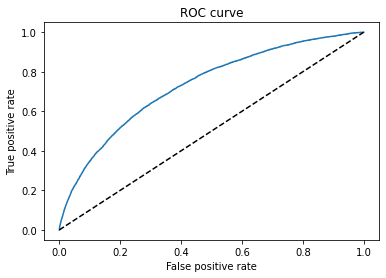

In [152]:
from sklearn.metrics import roc_curve

# calculation on validation data
y_test = pipeline.predict(application_data_valid_X)
y_test_proba = pipeline.predict_proba(application_data_valid_X)

# ROC curve
fpr, tpr, thresholds = roc_curve(application_data_valid_Y, y_test_proba[:][: , 1])

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');

AUC

In [153]:
from sklearn.metrics import roc_auc_score

# AUROC calculation
AUROC = roc_auc_score(application_data_valid_Y, y_test_proba[:][: , 1])
# Gini calculation
Gini = AUROC * 2 - 1
# print AUROC and Gini
print('AUROC: %.4f' % (AUROC))
print('Gini: %.4f' % (Gini))

AUROC: 0.7308
Gini: 0.4616


In [154]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(application_data_valid_Y, y_test)

In [155]:
min_score = 0
max_score = 499

# 从逻辑回归系数创建评分表
application_data_ref_categories = pd.DataFrame(summary_table.loc[1:100,"Feature name"].tolist(), columns = ['Feature name'])
application_data_scorecard =  summary_table.merge(application_data_ref_categories, on='Feature name', how='left').reset_index()

# 特征管理
application_data_scorecard['Original feature name'] = application_data_scorecard['Feature name'].str.split(':').str[0]

# 观察到的最低分数
min_sum_coef = application_data_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
# 观察到的最高分数
max_sum_coef = application_data_scorecard.groupby('Original feature name')['Coefficients'].max().sum()

In [156]:
# 计算分数获得0-500个基点
application_data_scorecard['Score - Calculation'] = application_data_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
application_data_scorecard.loc[0, 'Score - Calculation'] = ((application_data_scorecard.loc[0,'Coefficients'] - min_sum_coef) /(max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score

# 四舍五入
application_data_scorecard['Score - Final'] = application_data_scorecard['Score - Calculation'].round(0)

#查看最低和最高分
print(application_data_scorecard.groupby('Original feature name')['Score - Final'].min().sum())
print(application_data_scorecard.groupby('Original feature name')['Score - Final'].max().sum())

0.0
500.0


In [157]:
application_data_scorecard[0:50]

,index,Feature name,Coefficients,Original feature name,Score - Calculation,Score - Final
0,0,Intercept,0.010453,Intercept,243.615039,244.0
1,1,CAT_EXT_SOURCE_2:3,0.217852,CAT_EXT_SOURCE_2,8.717133,9.0
2,2,CAT_EXT_SOURCE_2:5,-0.258075,CAT_EXT_SOURCE_2,-10.326616,-10.0
3,3,CAT_EXT_SOURCE_2:6,-0.666892,CAT_EXT_SOURCE_2,-26.684983,-27.0
4,4,CAT_EXT_SOURCE_3:2,0.840032,CAT_EXT_SOURCE_3,33.612997,34.0
5,5,CAT_EXT_SOURCE_3:3,0.295873,CAT_EXT_SOURCE_3,11.839027,12.0
6,6,CAT_EXT_SOURCE_3:5,-0.278503,CAT_EXT_SOURCE_3,-11.143996,-11.0
7,7,CAT_EXT_SOURCE_3:6,-0.849190,CAT_EXT_SOURCE_3,-33.979452,-34.0
8,8,CAT_AMT_GOODS_PRICE:2,-0.108829,CAT_AMT_GOODS_PRICE,-4.354663,-4.0
9,9,CAT_AMT_GOODS_PRICE:3,0.329774,CAT_AMT_GOODS_PRICE,13.195549,13.0


In [158]:
nomCol=application_data_scorecard.loc[:,["Feature name"]].values.tolist()
application_data_scorecard=application_data_scorecard.loc[:,["Score - Final"]]
application_data_scorecard_T=application_data_scorecard.reset_index(drop=True).transpose()
for col in range(len(nomCol)) : 
#     type(nomCol[col])
    a=str(nomCol[col])
    a=a.replace("']", "")
    a=a.replace("['", "")
    application_data_scorecard_T.rename(columns={col:a}, inplace=True)

In [159]:
application_data_X_Score=application_data_X

for col in application_data_scorecard_T.columns.tolist() :
    if col!="Intercept": 
        coef=application_data_scorecard_T.loc['Score - Final',col]
        application_data_X_Score['Score_'+ col]=application_data_X_Score[col]*coef

In [160]:
list = [col for col in application_data_X_Score.columns if col.startswith('Score_')]
application_data_X_Score['ScoreTot']=application_data_X_Score[list].sum(axis=1)    
application_data_X_Score['ScoreTot']=application_data_X_Score['ScoreTot']+application_data_scorecard_T["Intercept"].to_frame().iloc[0,0]

(array([2.0000e+01, 1.2200e+02, 2.6840e+03, 2.9373e+04, 8.1921e+04,
        9.9327e+04, 6.1829e+04, 2.4077e+04, 4.8740e+03, 3.9900e+02]),
 array([ 76. , 104.4, 132.8, 161.2, 189.6, 218. , 246.4, 274.8, 303.2,
        331.6, 360. ]),
 <BarContainer object of 10 artists>)

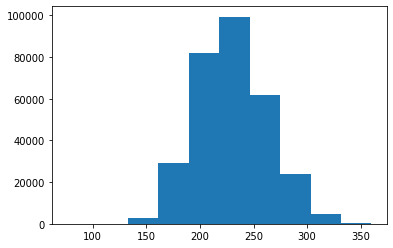

In [161]:
plt.hist(application_data_X_Score['ScoreTot'])

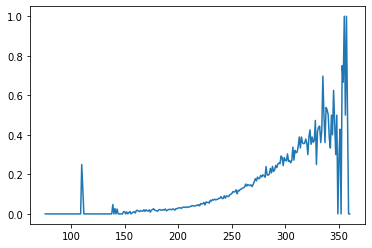

In [162]:
application_data_X_Score = pd.concat([application_data_X_Score,application_data_Y], axis=1)
aggregations = {'TARGET': [sum,'count',"mean"]}
tab=application_data_X_Score.groupby(["ScoreTot"]).agg(aggregations).reset_index()
plt.plot(tab.iloc[:,0], tab.iloc[:,3])

# 最近邻

In [164]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier()
knn.fit(application_data_train_X,application_data_train_Y)

KNeighborsClassifier()

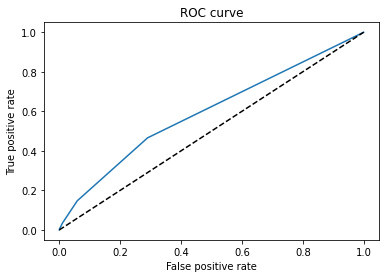

In [165]:
y_test = knn.predict(application_data_valid_X)
y_test_proba = knn.predict_proba(application_data_valid_X)

# ROC curve
fpr, tpr, thresholds = roc_curve(application_data_valid_Y, y_test_proba[:][: , 1])

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');

In [166]:
from sklearn.metrics import roc_auc_score

# AUROC calculation
AUROC = roc_auc_score(application_data_valid_Y, y_test_proba[:][: , 1])
# Gini calculation
Gini = AUROC * 2 - 1
# print AUROC and Gini
print('AUROC: %.4f' % (AUROC))
print('Gini: %.4f' % (Gini))

AUROC: 0.5957
Gini: 0.1915


# XGboost

In [178]:
from sklearn.model_selection import train_test_split,cross_val_score
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import precision_score,roc_auc_score


xgbc = XGBClassifier()
xgbc.fit(application_data_train_X,application_data_train_Y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

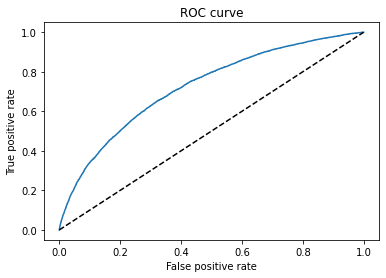

In [179]:
y_test = xgbc.predict(application_data_valid_X)
y_test_proba = xgbc.predict_proba(application_data_valid_X)

# ROC curve
fpr, tpr, thresholds = roc_curve(application_data_valid_Y, y_test_proba[:][: , 1])

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');

In [180]:
from sklearn.metrics import roc_auc_score

# AUROC calculation
AUROC = roc_auc_score(application_data_valid_Y, y_test_proba[:][: , 1])
# Gini calculation
Gini = AUROC * 2 - 1
# print AUROC and Gini
print('AUROC: %.4f' % (AUROC))
print('Gini: %.4f' % (Gini))

AUROC: 0.7230
Gini: 0.4460


In [191]:
xgbc = XGBClassifier()
pipeline = Pipeline(steps=[('model', xgbc)])
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# Build the score model
scores = cross_val_score(pipeline, application_data_train_X, application_data_train_Y, scoring = 'roc_auc', cv = cv)

# Show model performance based on train table
AUROC = np.mean(scores)
GINI = AUROC * 2 - 1
print('Mean AUROC: %.4f' % (AUROC))
print('Gini: %.4f' % (GINI))

# Complete calculation of the model on train table
pipeline.fit(application_data_train_X, application_data_train_Y)

Mean AUROC: 0.7213
Gini: 0.4426


Pipeline(steps=[('model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

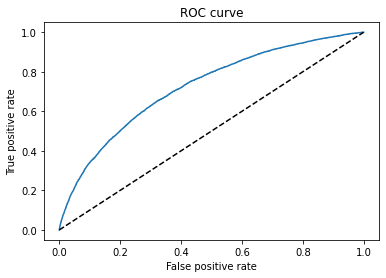

In [192]:
y_test = pipeline.predict(application_data_valid_X)
y_test_proba = pipeline.predict_proba(application_data_valid_X)

# ROC curve
fpr, tpr, thresholds = roc_curve(application_data_valid_Y, y_test_proba[:][: , 1])

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');

In [193]:
from sklearn.metrics import roc_auc_score

# AUROC calculation
AUROC = roc_auc_score(application_data_valid_Y, y_test_proba[:][: , 1])
# Gini calculation
Gini = AUROC * 2 - 1
# print AUROC and Gini
print('AUROC: %.4f' % (AUROC))
print('Gini: %.4f' % (Gini))

AUROC: 0.7230
Gini: 0.4460
